### 导入数据

In [12]:
import torch
import pandas as pd
import numpy as np
# 新数据
# 读取所有数据
paths = [
    # '../data/processed_data_900_1.csv', '../data/processed_data_900_2.csv', '../data/processed_data_900_3.csv',
    # '../data/processed_data_1050_1.csv', '../data/processed_data_1050_2.csv', '../data/processed_data_1050_3.csv',
    # '../data/processed_data_1200_1.csv', '../data/processed_data_1200_2.csv', '../data/processed_data_1200_3.csv',
    # '../data/processed_data_1350_1.csv', '../data/processed_data_1350_2.csv', '../data/processed_data_1350_3.csv',
    # '../data/processed_data_1500_1.csv', '../data/processed_data_1500_2.csv', '../data/processed_data_1500_3.csv',
    # '../data/processed_data_1650_1.csv', '../data/processed_data_1650_2.csv', '../data/processed_data_1650_3.csv',
    # '../data/new/processed_data_1500_1.csv', '../data/new/processed_data_1500_2.csv', '../data/new/processed_data_1500_3.csv',
    # '../data/new/processed_data_1500_4.csv', '../data/new/processed_data_1500_5.csv', '../data/new/processed_data_1500_6.csv'
    '../data/clean/clean_processed_data_1500_1.csv', '../data/clean/clean_processed_data_1500_2.csv', '../data/clean/clean_processed_data_1500_3.csv',
    '../data/clean/clean_processed_data_1500_4.csv', '../data/clean/clean_processed_data_1500_5.csv', '../data/clean/clean_processed_data_1500_6.csv'
]

# 读取并拼接数据
# all_data = pd.concat([pd.read_csv(path) for path in paths], ignore_index=True)
# all_data = np.array(all_data)
# all_data.shape

In [13]:
all_data = []
for path in paths:
    data = pd.read_csv(path)
    data = np.array(data)
    all_data.append(data)
all_data = np.concatenate(all_data, axis=0)

In [4]:
all_data.shape

(2652, 1)

In [2]:
# 
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
import pandas as pd
# 设定随机种子以保证结果可复现
torch.manual_seed(0)
np.random.seed(0)

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
all_data

array([['(Mo3O9,91);(Mo3O9S2,13);(MoO2,5);(MoOS,11);(MoO2,13);(MoO,40);(MoOS2,3);(MoO,1);(MoOS2,14);(MoS,2);(MoOS2,1);(MoS,1);(MoOS2,2);(MoS,1);(MoOS2,4);(MoS,1);(MoOS2,2);(MoS,1);(MoOS2,8);(MoS,1);(MoOS2,12);(MoS,1);(MoOS2,4);(MoS,2);(MoOS2,15);(MoS,1);(MoOS2,8);(MoS,1);(MoOS2,4);(MoS,2);(MoOS2,6);(MoS,1);(MoOS2,2);(MoS,1);(MoOS2,13);(MoS,3);(MoO2S,1);(MoOS,76);(MoOS3,2);(MoOS,7);(MoOS3,7);(MoOS,49);(MoOS3,19);(MoS2,101);(Mo2S7,3);(MoS3,1);(Mo2S7,57);(Mo2S5,1);(Mo2S7,118);(MoO,25);(MoOS,16);(MoS,9);(MoS2,52);(MoO,6);(MoOS2,4);(MoS,1);(MoOS2,9);(MoS,156);(MoS3,9);(MoS,1);(MoS3,57);(MoS,1);(MoS3,68);(MoOS4,1);(MoS3,52);(MoS5,27);(MoS3,187);(MoOS4,1);(MoS3,84);(MoS5,269);(MoOS6,3);(MoS5,1);(MoOS6,4);(MoS3,1);(MoS5,1);(MoOS6,10);(MoS5,1);(MoOS6,1);(MoS5,1);(MoOS6,2);(MoS5,1);(MoOS6,3);(MoS5,158);(MoS6,4);(MoS4,1);(MoS6,759);(MoOS7,1);(MoS6,743);(MoS8,38);(MoS6,539);(MoOS7,1);(MoS6,2);(MoOS7,15);(MoS6,2);(MoOS7,6);(MoS6,1);(MoOS7,101);(MoS6,3);(MoOS7,123);(MoS6,321);(MoS8,208);(MoS10,1);(M

In [14]:
# 处理数据的函数
def process_data(data):
    pro_data = []
    for record in data:
        # 每条记录是一个字符串，将其按分号分割
        elements = record[0].split(';')
        processed_data = []
        for element in elements:
            # print(element)
            # 去除括号并按逗号分割成元素和数字
            mol, count = element.strip('()').split(',')
            processed_data.append((mol, int(count)))
        pro_data.append(np.array(processed_data))
    return pro_data

# 调用函数处理数据
processed = process_data(all_data)
processed = np.array(processed)
print(processed.shape)

(2652,)


C:\Users\dfgje\AppData\Local\Temp\ipykernel_38492\2383512409.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  processed = np.array(processed)


In [6]:
processed[1]

array([['Mo3O9', '91'],
       ['Mo3O9S2', '13'],
       ['Mo2O4', '5'],
       ...,
       ['MoS5', '1'],
       ['MoOS6', '32'],
       ['MoS5', '1']], dtype='<U11')

In [3]:
# 加载 .npy 文件
new_processed = np.load('../data/new_processed20.npy', allow_pickle=True)
print(new_processed.shape)

(2652,)


In [5]:
new_processed[0].shape

(41, 2)

### Embedding

In [4]:
# incode 编码，转换成向量
def incode(molecule):
    vec = np.zeros(3)
    length = len(molecule)
    Mo = molecule.find('Mo')
    O = molecule.find('O')
    S = molecule.find('S')
    # print(Mo, O, S)
    moi = oi = si = 0
    moi = 1
    if O==-1 and S==-1 and length>2:
        moi = molecule[Mo+2:]
    elif O != -1:
        if O > Mo + 2:
            moi = int(molecule[Mo+2:O])
        else:
            moi = 1
        if S == O + 1 or O+1==length:
            oi = 1
        elif S==-1:
            oi = int(molecule[O+1:])
        else:
            oi = int(molecule[O+1:S])
    elif S != -1:
        if S > Mo + 2:
            moi = int(molecule[Mo+2:S])
        else:
            moi = 1
        if S+1==length:
            si = 1
        else:
            si = int(molecule[S+1:])
    if S!=-1:
        if S+1==length:
            si = 1
        else:
            si = int(molecule[S+1:])
    vec = np.array([moi, oi, si])
    return vec
incode('MoOS13')

array([ 1,  1, 13])

In [15]:
# 使用列表推导式遍历二维数组并调用函数进行编码，将返回值存储在新的二维数组中
# all_data = [[incode(value) for value in row] for row in cy_data]
# all_data = np.array(all_data)
# all_data.shape
cy_data = processed#.iloc[:, :2500]#.iloc[:, ::10]  # 对数据进行每隔10列重新采样
cy_data = np.array(cy_data)
# cy_data = [[incode(value[0]) for value in row] for row in cy_data]
cy_data = [[np.append(incode(value[0]), int(value[1])) for value in row] for row in cy_data]
# cy_data = np.concatenate(cy_data)
cy_data = np.array(cy_data)
cy_data.shape #(1726, 3000, 3)

C:\Users\dfgje\AppData\Local\Temp\ipykernel_38492\161354326.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cy_data = np.array(cy_data)


(2652,)

In [ ]:
# 找到cy——data中的最大值
max_num = 0
for row in cy_data:
    for value in row:
        if value[3] > max_num:
            max_num = value[3]
max_num

19395

In [16]:
import numpy as np
from tqdm import tqdm

# 构建数据集
def create_dataset(data, sequence_length):
    """
    将输入数据分割为长度为 sequence_length 的序列。
    """
    sequences = []
    for i in range(len(data) - sequence_length):
        # 构建序列
        sequences.append(data[i:i + sequence_length])
    return sequences

# 参数
sequence_length = 10

# 假设 cy_data 是 list，转换为合适的格式
# 如果 cy_data 是嵌套 list，则可以直接用它；否则，先检查数据格式
sequences = []
X = []
y = []
for row in cy_data:
    sequence = create_dataset(row, sequence_length)
    sequence = np.array(sequence)
    sequences.append(sequence)
    # print(sequence.shape)
    X.append(sequence[:-1])  # 除去最后一个序列
    y.append(sequence[1:, -1])  # 每个序列的最后一个时间步作为输出

sequences = np.array(sequences)
X = np.array(X)
y = np.array(y)
# 检查生成的序列形状
print('sequences.shape', sequences.shape)

# 构建输入 X 和输出 y

print('X.shape', X.shape)  # 输入的形状
print('y.shape', y.shape)  # 输出的形状


sequences.shape (2652,)
X.shape (2652,)
y.shape (2652,)


C:\Users\dfgje\AppData\Local\Temp\ipykernel_38492\952688469.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array(sequences)
C:\Users\dfgje\AppData\Local\Temp\ipykernel_38492\952688469.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
C:\Users\dfgje\AppData\Local\Temp\ipykernel_38492\952688469.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [17]:
print('X.shape', X.shape)  # 输入的形状
print('y.shape', y.shape)  # 输出的形状
print('X[0].shape', X[0].shape)  # 输入的形状
print('y[0].shape', y[0].shape)  # 输出的形状

X.shape (2652,)
y.shape (2652,)
X[0].shape (109, 10, 4)
y[0].shape (109, 4)


In [18]:
X_concat = np.concatenate(X)
X_concat = X_concat.reshape(-1, 10, 4)
y_concat = np.concatenate(y)

print('X.shape', X_concat.shape)# X_train.shape (1035, 2899, 100, 3)
print('y.shape', y_concat.shape)# X_test.shape (691, 2899, 100, 3)

X.shape (385835, 10, 4)
y.shape (385835, 4)


In [59]:
# 找到 y 中第四个特征大于 10000 的索引
filter_condition = y_concat[:, 3] <= 8000

# 根据索引筛选 X 和 y
X_filtered = X_concat[filter_condition]
y_filtered = y_concat[filter_condition]

# 查看结果
print(X_filtered.shape)
print(y_filtered.shape)

(91439, 10, 4)
(91439, 4)


### 重采样

#### 先重采样


In [60]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# 获取第四个特征
y_feature4 = y_filtered[:, 3]

# 设定分桶数（可以调整）
num_bins = 10
bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# 创建DataFrame便于处理
df = pd.DataFrame({'bin': bin_labels})
df['index'] = np.arange(len(y_filtered))

# 计算每个桶的样本数
bin_counts = df['bin'].value_counts()

# 选择目标样本数（取最大桶的样本数量）
target_samples = bin_counts.max()

resampled_indices = []

for bin_label, count in bin_counts.items():
    bin_indices = df[df['bin'] == bin_label]['index'].values
    
    # 过采样到目标样本数
    sampled = np.random.choice(bin_indices, target_samples, replace=True)
    
    resampled_indices.extend(sampled)

# 获取新的数据集
X_resampled = X_filtered[resampled_indices]
y_resampled = y_filtered[resampled_indices]

print(f"重采样后的X.shape: {X_resampled.shape}")
print(f"重采样后的y.shape: {y_resampled.shape}")


重采样后的X.shape: (733359, 10, 4)
重采样后的y.shape: (733359, 4)


In [44]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# 获取第四个特征
y_feature4 = y_filtered[:, 3]

# 设定分桶数（可以调整）
num_bins = 10
bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# 创建DataFrame便于处理
df = pd.DataFrame({'bin': bin_labels})
df['index'] = np.arange(len(y_filtered))

# 计算每个桶的样本数
bin_counts = df['bin'].value_counts()

# 选择目标样本数（可以选择均衡化）
# target_samples = bin_counts.median()  # 目标数量取中位数
# 选择目标样本数（取最大桶的样本数量）
target_samples = bin_counts.max()

resampled_indices = []

for bin_label, count in bin_counts.items():
    bin_indices = df[df['bin'] == bin_label]['index'].values
    
    if count > target_samples:
        # 欠采样
        sampled = np.random.choice(bin_indices, int(target_samples), replace=False)
    else:
        # 过采样
        sampled = np.random.choice(bin_indices, int(target_samples), replace=True)
    
    resampled_indices.extend(sampled)

# 获取新的数据集
X_resampled = X_filtered[resampled_indices]
y_resampled = y_filtered[resampled_indices]

print(f"重采样后的X.shape: {X_resampled.shape}")
print(f"重采样后的y.shape: {y_resampled.shape}")


重采样后的X.shape: (733359, 10, 4)
重采样后的y.shape: (733359, 4)


In [60]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# 获取第四个特征
y_feature4 = y_concat[:, 3]

# 设定分桶数（可以调整）
num_bins = 10
bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# 创建DataFrame便于处理
df = pd.DataFrame({'bin': bin_labels})
df['index'] = np.arange(len(y_concat))

# 计算每个桶的样本数
bin_counts = df['bin'].value_counts()

# 选择目标样本数（取最大桶的样本数量）
target_samples = bin_counts.max()

resampled_indices = []

for bin_label, count in bin_counts.items():
    bin_indices = df[df['bin'] == bin_label]['index'].values
    
    # 过采样到目标样本数
    sampled = np.random.choice(bin_indices, target_samples, replace=True)
    
    resampled_indices.extend(sampled)

# 获取新的数据集
X_resampled = X_concat[resampled_indices]
y_resampled = y_concat[resampled_indices]

print(f"重采样后的X.shape: {X_resampled.shape}")
print(f"重采样后的y.shape: {y_resampled.shape}")


重采样后的X.shape: (876942, 10, 4)
重采样后的y.shape: (876942, 4)


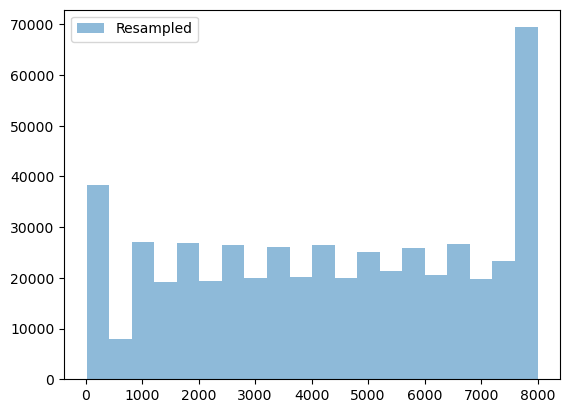

In [61]:
import matplotlib.pyplot as plt

# plt.hist(y_concat[:, 3], bins=20, alpha=0.5, label="Original")
plt.hist(y_train_resampled[:, 3], bins=20, alpha=0.5, label="Resampled")
plt.legend()
plt.show()

In [9]:
# 将数据划分为训练集和测试集，可以指定测试集的大小和随机种子
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print('X_train.shape', X_train.shape)# X_train.shape (1035, 2899, 100, 3)
print('X_test.shape', X_test.shape)# X_test.shape (691, 2899, 100, 3)
print('y_train.shape', y_train.shape)# y_train.shape (1035, 2899, 3)
print('y_test.shape', y_test.shape)# y_test.shape (691, 2899, 3)

X_train.shape (513351, 10, 4)
X_test.shape (220008, 10, 4)
y_train.shape (513351, 4)
y_test.shape (220008, 4)


#### 先分训练集和测试集

In [19]:
# 将数据划分为训练集和测试集，可以指定测试集的大小和随机种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape', X_train.shape)# X_train.shape (1035, 2899, 100, 3)
print('X_test.shape', X_test.shape)# X_test.shape (691, 2899, 100, 3)
print('y_train.shape', y_train.shape)# y_train.shape (1035, 2899, 3)
print('y_test.shape', y_test.shape)# y_test.shape (691, 2899, 3)

X_train.shape (1856,)
X_test.shape (796,)
y_train.shape (1856,)
y_test.shape (796,)


max(y_train)

In [11]:
X_train.shape

(1856,)

In [20]:
X_train = np.concatenate(X_train)
X_train = X_train.reshape(-1, 10, 4)
y_train = np.concatenate(y_train)
X_test = np.concatenate(X_test)
X_test = X_test.reshape(-1, 10, 4)
y_test = np.concatenate(y_test)
print('X_train.shape', X_train.shape)# X_train.shape (1035, 2899, 100, 3)
print('X_test.shape', X_test.shape)# X_test.shape (691, 2899, 100, 3)
print('y_train.shape', y_train.shape)# y_train.shape (1035, 2899, 3)
print('y_test.shape', y_test.shape)# y_test.shape (691, 2899, 3)

X_train.shape (269775, 10, 4)
X_test.shape (116060, 10, 4)
y_train.shape (269775, 4)
y_test.shape (116060, 4)


In [22]:
# 创建掩码，筛选第四个特征 <= num 的样本
num = 200
mask_train = y_train[:, 3] <= num

# 应用掩码到X_train和y_train
X_train = X_train[mask_train]
y_train = y_train[mask_train]

# 创建掩码，筛选第四个特征 <= num 的样本
mask_test = y_test[:, 3] <= num


# 应用掩码到X_test和y_test
X_test = X_test[mask_test]
y_test = y_test[mask_test]

print("处理后的形状:")
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

处理后的形状:
X_train.shape (214378, 10, 4)
y_train.shape (214378, 4)
X_test.shape (92260, 10, 4)
y_test.shape (92260, 4)


In [56]:
int(np.median(bin_counts))

779

In [11]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# 获取第四个特征
y_feature4 = y_train[:, 3]

# 设定分桶数（可以调整）
num_bins = 20
bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# 创建DataFrame便于处理
df = pd.DataFrame({'bin': bin_labels})
df['index'] = np.arange(len(y_train))

# 计算每个桶的样本数
bin_counts = df['bin'].value_counts()

# 选择目标样本数（目标样本数取每个桶的中位数）
target_samples = 2000 # int(np.median(bin_counts))

resampled_indices = []

for bin_label, count in bin_counts.items():
    bin_indices = df[df['bin'] == bin_label]['index'].values
    
    if count > target_samples:
        # 如果该桶的样本数量大于目标样本数，进行欠采样
        sampled = np.random.choice(bin_indices, target_samples, replace=False)
    else:
        # 如果该桶的样本数量小于或等于目标样本数，保持不变
        sampled = bin_indices
    
    resampled_indices.extend(sampled)

# 获取新的数据集
X_train_resampled = X_train[resampled_indices]
y_train_resampled = y_train[resampled_indices]

print(f"重采样后的X.shape: {X_train_resampled.shape}")
print(f"重采样后的y.shape: {y_train_resampled.shape}")


# 获取第四个特征
y_feature4 = y_test[:, 3]

# 设定分桶数（可以调整）
num_bins = 20
bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# 创建DataFrame便于处理
df = pd.DataFrame({'bin': bin_labels})
df['index'] = np.arange(len(y_test))

# 计算每个桶的样本数
bin_counts = df['bin'].value_counts()

# 选择目标样本数（目标样本数取每个桶的中位数）
target_samples =  800 # int(np.median(bin_counts))

resampled_indices = []

for bin_label, count in bin_counts.items():
    bin_indices = df[df['bin'] == bin_label]['index'].values
    
    if count > target_samples:
        # 如果该桶的样本数量大于目标样本数，进行欠采样
        sampled = np.random.choice(bin_indices, target_samples, replace=False)
    else:
        # 如果该桶的样本数量小于或等于目标样本数，保持不变
        sampled = bin_indices
    
    resampled_indices.extend(sampled)

# 获取新的数据集
X_test_resampled = X_test[resampled_indices]
y_test_resampled = y_test[resampled_indices]

print(f"重采样后的X.shape: {X_test_resampled.shape}")
print(f"重采样后的y.shape: {y_test_resampled.shape}")

重采样后的X.shape: (17101, 10, 4)
重采样后的y.shape: (17101, 4)
重采样后的X.shape: (7102, 10, 4)
重采样后的y.shape: (7102, 4)


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.utils import resample

# # 获取第四个特征
# y_feature4 = y_test[:, 3]

# # 设定分桶数（可以调整）
# num_bins = 10
# bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
# bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# # 创建DataFrame便于处理
# df = pd.DataFrame({'bin': bin_labels})
# df['index'] = np.arange(len(y_test))

# # 计算每个桶的样本数
# bin_counts = df['bin'].value_counts()

# # 选择目标样本数（取最大桶的样本数量）
# target_samples = bin_counts.max()

# resampled_indices = []

# for bin_label, count in bin_counts.items():
#     bin_indices = df[df['bin'] == bin_label]['index'].values
    
#     # 过采样到目标样本数
#     sampled = np.random.choice(bin_indices, target_samples, replace=True)
    
#     resampled_indices.extend(sampled)

# # 获取新的数据集
# X_test_resampled = X_test[resampled_indices]
# y_test_resampled = y_test[resampled_indices]

# print(f"重采样后的X.shape: {X_test_resampled.shape}")
# print(f"重采样后的y.shape: {y_test_resampled.shape}")


重采样后的X.shape: (223135, 10, 4)
重采样后的y.shape: (223135, 4)


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.utils import resample

# # 获取第四个特征
# y_feature4 = y_train[:, 3]

# # 设定分桶数（可以调整）
# num_bins = 10
# bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
# bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# # 创建DataFrame便于处理
# df = pd.DataFrame({'bin': bin_labels})
# df['index'] = np.arange(len(y_train))

# # 计算每个桶的样本数
# bin_counts = df['bin'].value_counts()

# # 选择目标样本数（可以选择均衡化）
# # target_samples = bin_counts.median()  # 目标数量取中位数
# # 选择目标样本数（取最大桶的样本数量）
# target_samples = bin_counts.max()

# resampled_indices = []

# for bin_label, count in bin_counts.items():
#     bin_indices = df[df['bin'] == bin_label]['index'].values
    
#     if count > target_samples:
#         # 欠采样
#         sampled = np.random.choice(bin_indices, int(target_samples), replace=False)
#     else:
#         # 过采样
#         sampled = np.random.choice(bin_indices, int(target_samples), replace=True)
    
#     resampled_indices.extend(sampled)

# # 获取新的数据集
# X_train_resampled = X_train[resampled_indices]
# y_train_resampled = y_train[resampled_indices]

# print(f"重采样后的X.shape: {X_train_resampled.shape}")
# print(f"重采样后的y.shape: {y_train_resampled.shape}")

重采样后的X.shape: (510224, 10, 4)
重采样后的y.shape: (510224, 4)


In [12]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# 获取第四个特征
y_feature4 = y_test[:, 3]

# 设定分桶数（可以调整）
num_bins = 10
bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# 创建DataFrame便于处理
df = pd.DataFrame({'bin': bin_labels})
df['index'] = np.arange(len(y_test))

# 计算每个桶的样本数
bin_counts = df['bin'].value_counts()

# 选择目标样本数（可以选择均衡化）
# target_samples = bin_counts.median()  # 目标数量取中位数
# 选择目标样本数（取最大桶的样本数量）
target_samples = bin_counts.max()

resampled_indices = []

for bin_label, count in bin_counts.items():
    bin_indices = df[df['bin'] == bin_label]['index'].values
    
    if count > target_samples:
        # 欠采样
        sampled = np.random.choice(bin_indices, int(target_samples), replace=False)
    else:
        # 过采样
        sampled = np.random.choice(bin_indices, int(target_samples), replace=True)
    
    resampled_indices.extend(sampled)

# 获取新的数据集
X_test_resampled = X_test[resampled_indices]
y_test_resampled = y_test[resampled_indices]

print(f"重采样后的X.shape: {X_test_resampled.shape}")
print(f"重采样后的y.shape: {y_test_resampled.shape}")

重采样后的X.shape: (223135, 10, 4)
重采样后的y.shape: (223135, 4)


In [ ]:
# import numpy as np
# import pandas as pd

# def resample_by_target(X, y, n_bins=10, strategy="undersample"):
#     """
#     对数据集 (X, y) 进行基于 y[:, 3] 的均匀重采样
#     参数：
#         X: (N, 10, 4) 训练或测试数据
#         y: (N, 4)  目标标签
#         n_bins: 分桶的数量，默认 10
#         strategy: 采样策略，"undersample" 进行下采样，"oversample" 进行上采样
#     返回：
#         X_resampled, y_resampled: 重新采样后的数据
#     """
#     # 获取 y[:, 3] 作为分桶依据
#     y_feature = y[:, 3]
    
#     # 使用 pd.qcut 进行等频分桶
#     bins, bin_edges = pd.qcut(y_feature, q=n_bins, retbins=True, labels=False, duplicates="drop")
    
#     # 统计每个桶的样本数
#     bin_counts = np.bincount(bins)
    
#     # 选择采样的目标数量
#     if strategy == "undersample":
#         target_size = bin_counts.min()  # 选择最小桶数量进行下采样
#     elif strategy == "oversample":
#         target_size = bin_counts.max()  # 选择最大桶数量进行上采样
#     else:
#         raise ValueError("strategy 只能是 'undersample' 或 'oversample'")
    
#     # 存储采样后的索引
#     sampled_indices = []
    
#     # 遍历每个桶并进行采样
#     for bin_id in range(len(bin_counts)):
#         indices = np.where(bins == bin_id)[0]  # 获取该桶的索引
        
#         if len(indices) > target_size:
#             sampled_bin = np.random.choice(indices, target_size, replace=True)  # 下采样
#         else:
#             sampled_bin = np.random.choice(indices, target_size, replace=True)  # 上采样
            
#         sampled_indices.extend(sampled_bin)
    
#     # 打乱索引
#     np.random.shuffle(sampled_indices)
    
#     # 生成重采样后的数据
#     X_resampled = X[sampled_indices]
#     y_resampled = y[sampled_indices]
    
#     return X_resampled, y_resampled

# # 对训练集和测试集分别进行重采样
# X_train_resampled, y_train_resampled = resample_by_target(X_train, y_train, n_bins=10, strategy="undersample")
# X_test_resampled, y_test_resampled = resample_by_target(X_test, y_test, n_bins=10, strategy="undersample")

# # 保存结果
# np.save("X_train_resampled.npy", X_train_resampled)
# np.save("y_train_resampled.npy", y_train_resampled)
# np.save("X_test_resampled.npy", X_test_resampled)
# np.save("y_test_resampled.npy", y_test_resampled)

# # 打印数据变化情况
# print("Resampled X_train shape:", X_train_resampled.shape)
# print("Resampled y_train shape:", y_train_resampled.shape)
# print("Resampled X_test shape:", X_test_resampled.shape)
# print("Resampled y_test shape:", y_test_resampled.shape)

Resampled X_train shape: (61560, 10, 4)
Resampled y_train shape: (61560, 4)
Resampled X_test shape: (27190, 10, 4)
Resampled y_test shape: (27190, 4)


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.utils import resample

# # 获取第四个特征
# y_feature4 = y_train[:, 3]

# # 设定分桶数（可以调整）
# num_bins = 10
# bins = np.linspace(y_feature4.min(), y_feature4.max(), num_bins + 1)
# bin_labels = np.digitize(y_feature4, bins)  # 将数据分配到不同的桶

# # 创建DataFrame便于处理
# df = pd.DataFrame({'bin': bin_labels})
# df['index'] = np.arange(len(y_train))

# # 计算每个桶的样本数
# bin_counts = df['bin'].value_counts()

# # 选择目标样本数（取最小桶的样本数量）
# # target_samples = bin_counts.min()
# target_samples = bin_counts.median()  # 目标数量取中位数


# resampled_indices = []

# for bin_label, count in bin_counts.items():
#     bin_indices = df[df['bin'] == bin_label]['index'].values
    
#     # 欠采样到目标样本数（如果样本多于目标数量）
#     if count > target_samples:
#         sampled = np.random.choice(bin_indices, target_samples, replace=False)
#     else:
#         sampled = bin_indices
    
#     resampled_indices.extend(sampled)

# # 获取新的数据集
# X_train_resampled = X_train[resampled_indices]
# y_train_resampled = y_train[resampled_indices]

# print(f"重采样后的X.shape: {X_train_resampled.shape}")
# print(f"重采样后的y.shape: {y_train_resampled.shape}")

TypeError: 'numpy.float64' object cannot be interpreted as an integer

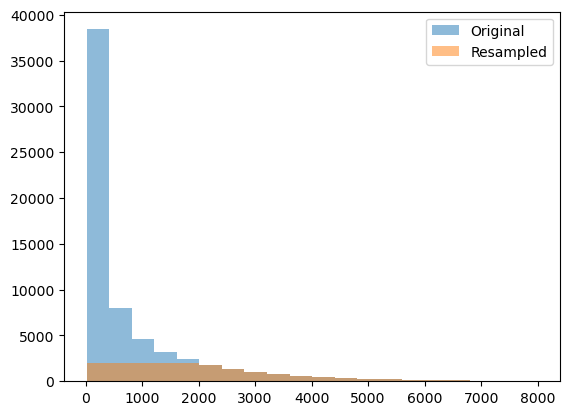

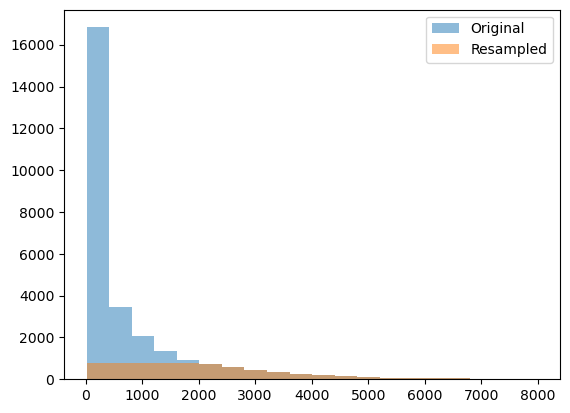

In [12]:
import matplotlib.pyplot as plt

plt.hist(y_train[:, 3], bins=20, alpha=0.5, label="Original")
plt.hist(y_train_resampled[:, 3], bins=20, alpha=0.5, label="Resampled")
plt.legend()
plt.show()

plt.hist(y_test[:, 3], bins=20, alpha=0.5, label="Original")
plt.hist(y_test_resampled[:, 3], bins=20, alpha=0.5, label="Resampled")
plt.legend()
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.utils import resample

# # 假设 y_train[:, 3] 是第四个特征
# y_train_fourth = y_train[:, 3]

# # 分箱（假设我们分为10个区间，可以根据需要调整）
# bins = np.linspace(np.min(y_train_fourth), np.max(y_train_fourth), num=11)  # 10个区间
# bin_indices = np.digitize(y_train_fourth, bins)

# # 创建一个 DataFrame 来存储每个区间的样本
# df = pd.DataFrame({'X': list(X_train), 'y': list(y_train), 'bin': bin_indices})

# # 计算每个区间的样本数
# bin_counts = df['bin'].value_counts()
 
# # 找到最大样本数
# max_count = bin_counts.max()

# # 创建一个新的列表来存储重采样后的数据
# resampled_X, resampled_y = [], []

# for bin_value in bin_counts.index:
#     # 获取当前区间的所有样本
#     bin_samples = df[df['bin'] == bin_value]
    
#     # 如果该区间的样本少于最大样本数，进行过采样
#     if len(bin_samples) < max_count:
#         bin_samples = resample(bin_samples, replace=True, n_samples=max_count, random_state=42)
#     # 如果该区间的样本多于最大样本数，进行欠采样
#     elif len(bin_samples) > max_count:
#         bin_samples = resample(bin_samples, replace=False, n_samples=max_count, random_state=42)
    
#     # 添加到重采样后的数据中
#     resampled_X.append(bin_samples['X'].to_list())
#     resampled_y.append(bin_samples['y'].to_list())

# # 将重采样后的数据合并
# resampled_X = np.concatenate(resampled_X, axis=0)
# resampled_y = np.concatenate(resampled_y, axis=0)

# # 检查重采样后的结果
# print("Resampled X_train shape:", resampled_X.shape)
# print("Resampled y_train shape:", resampled_y.shape)


Resampled X_train shape: (610731, 10, 4)
Resampled y_train shape: (610731, 4)


In [9]:
# 将数据划分为训练集和测试集，可以指定测试集的大小和随机种子
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.3, random_state=42)
print('X_train.shape', X_train.shape)# X_train.shape (1035, 2899, 100, 3)
print('X_test.shape', X_test.shape)# X_test.shape (691, 2899, 100, 3)
print('y_train.shape', y_train.shape)# y_train.shape (1035, 2899, 3)
print('y_test.shape', y_test.shape)# y_test.shape (691, 2899, 3)

X_train.shape (427511, 10, 4)
X_test.shape (183220, 10, 4)
y_train.shape (427511, 4)
y_test.shape (183220, 4)


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.utils import resample

# # 假设 y_train[:, 3] 是第四个特征
# y_train_fourth = y_train[:, 3]

# # 步骤 1: 去掉 y 的第四个特征大于 2500 的样本
# mask = y_train_fourth <= 2500
# X_train_filtered = X_train[mask]
# y_train_filtered = y_train[mask]

# # 步骤 2: 分箱
# bins = np.linspace(np.min(y_train_filtered[:, 3]), np.max(y_train_filtered[:, 3]), num=11)  # 10个区间
# bin_indices = np.digitize(y_train_filtered[:, 3], bins)

# # 步骤 3: 创建一个 DataFrame 来存储每个区间的样本
# df = pd.DataFrame({'X': list(X_train_filtered), 'y': list(y_train_filtered), 'bin': bin_indices})

# # 计算每个区间的样本数
# bin_counts = df['bin'].value_counts()

# # 找到最小的样本数（最小样本数用于欠采样）
# min_count = bin_counts.min()

# # 创建一个新的列表来存储重采样后的数据
# resampled_X, resampled_y = [], []

# for bin_value in bin_counts.index:
#     # 获取当前区间的所有样本
#     bin_samples = df[df['bin'] == bin_value]
    
#     # 进行欠采样：随机选择 min_count 个样本
#     bin_samples = resample(bin_samples, replace=False, n_samples=min_count, random_state=42)
    
#     # 添加到重采样后的数据中
#     resampled_X.append(bin_samples['X'].to_list())
#     resampled_y.append(bin_samples['y'].to_list())

# # 将重采样后的数据合并
# resampled_X = np.concatenate(resampled_X, axis=0)
# resampled_y = np.concatenate(resampled_y, axis=0)

# # 检查重采样后的结果
# print("Resampled X_train shape:", resampled_X.shape)
# print("Resampled y_train shape:", resampled_y.shape)

Resampled X_train shape: (55, 10, 4)
Resampled y_train shape: (55, 4)


### 数据形状处理

In [ ]:
# X_train[:, -1, -1] = 0
# X_test[:, -1, -1] = 0

In [39]:
X_train = X_train_resampled
y_train = y_train_resampled

X_test = X_test_resampled
y_test = y_test_resampled

In [29]:
# 将x_train和y_train接起来
y_train_expanded = np.expand_dims(y_train, axis=1)  # 将 y_train 从 (n, 4) 转换为 (n, 1, 4)
train_data = np.concatenate((X_train, y_train_expanded), axis=1)

# 将x_test和y_test接起来
y_test_expanded = np.expand_dims(y_test, axis=1)  # 将 y_test 从 (n, 4) 转换为 (n, 1, 4)
test_data = np.concatenate((X_test, y_test_expanded), axis=1)


train_data.shape, test_data.shape

((214378, 11, 4), (92260, 11, 4))

In [30]:
train_data[:, -1, -1] = 0
test_data[:, -1, -1] = 0

X_train = train_data
X_test = test_data

y_train = y_train[:, 3]
y_test = y_test[:, 3]
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train.shape, y_test.shape

((214378, 1), (92260, 1))

### 特征处理

In [42]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 假设你的训练集和测试集是 X_train 和 X_test
# X_train 和 X_test 形状为 (n_samples, 10, 4)

# 提取前三个特征（前3列）
X_train_features_3 = X_train[:, :, :3]
X_test_features_3 = X_test[:, :, :3]

# 提取第四个特征（第4列）
X_train_feature_4 = X_train[:, :, 3]
X_test_feature_4 = X_test[:, :, 3]

# 归一化前三个特征
scaler_3 = MinMaxScaler()
X_train_features_3 = scaler_3.fit_transform(X_train_features_3.reshape(-1, 3)).reshape(X_train_features_3.shape)
X_test_features_3 = scaler_3.transform(X_test_features_3.reshape(-1, 3)).reshape(X_test_features_3.shape)

# # 标准化前三个特征
# scaler = StandardScaler()
# X_train_features_3 = scaler.fit_transform(X_train_features_3.reshape(-1, 3)).reshape(X_train_features_3.shape)
# X_test_features_3 = scaler.transform(X_test_features_3.reshape(-1, 3)).reshape(X_test_features_3.shape)

# 对第四个特征取对数（确保数值大于0）
# X_train_feature_4 = np.log(X_train_feature_4 + 1e-6)  # 加上一个小常数避免log(0)
# X_test_feature_4 = np.log(X_test_feature_4 + 1e-6)

# 线性变化第四个特征 
# scaler = 1000
# X_train_feature_4 = X_train_feature_4/scaler
# X_test_feature_4 = X_test_feature_4/scaler


# 标准化第四个特征
scaler_4 = StandardScaler()
X_train_feature_4 = scaler_4.fit_transform(X_train_feature_4.reshape(-1, 1)).reshape(X_train_feature_4.shape)
X_test_feature_4 = scaler_4.transform(X_test_feature_4.reshape(-1, 1)).reshape(X_test_feature_4.shape)


# 合并处理后的特征
X_train_processed = np.concatenate([X_train_features_3, X_train_feature_4[..., np.newaxis]], axis=-1)
X_test_processed = np.concatenate([X_test_features_3, X_test_feature_4[..., np.newaxis]], axis=-1)

# 检查结果
print(X_train_processed.shape)  # 应该是 (n_samples, 10, 4)
print(X_test_processed.shape)   # 应该是 (n_samples, 10, 4)

# 对第四个特征取对数（确保数值大于0）
# y_train_processed = y_train
# y_test_processed = y_test

# y_train_processed = np.log(y_train + 1e-6)  # 加上一个小常数避免log(0)
# y_test_processed = np.log(y_test + 1e-6)

# 线性变化第四个特征 
# y_train_processed = y_train/scaler
# y_test_processed = y_test/scaler

# 对目标变量进行标准化
scaler_y = StandardScaler()
y_train_processed = scaler_y.fit_transform(y_train)  # 直接对y进行标准化
y_test_processed = scaler_y.transform(y_test)  # 使用训练集的标准化参数处理测试集


# 检查结果
print(y_train_processed.shape)  # 应该是 (n_samples, 4)
print(y_test_processed.shape)   # 应该是 (n_samples, 4)

(214378, 11, 4)
(92260, 11, 4)
(214378, 1)
(92260, 1)


In [64]:
# Box-Cox 变换
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# 假设你的训练集和测试集是 X_train 和 X_test，y_train 和 y_test
# X_train 和 X_test 形状为 (n_samples, 10, 4)

# 提取前三个特征（前3列）
X_train_features_3 = X_train[:, :, :3]
X_test_features_3 = X_test[:, :, :3]

# 提取第四个特征（第4列）
X_train_feature_4 = X_train[:, :, 3]
X_test_feature_4 = X_test[:, :, 3]

# 归一化前三个特征
scaler = MinMaxScaler()
X_train_features_3 = scaler.fit_transform(X_train_features_3.reshape(-1, 3)).reshape(X_train_features_3.shape)
X_test_features_3 = scaler.transform(X_test_features_3.reshape(-1, 3)).reshape(X_test_features_3.shape)

# 对第四个特征进行 Box-Cox 变换
# 由于 Box-Cox 变换要求数据为正数，确保没有零或负数
X_train_feature_4_transformed, lambda_train = stats.boxcox(X_train_feature_4.flatten()+1e-6)
X_test_feature_4_transformed = (X_test_feature_4.flatten()+1e-6 ** lambda_train - 1) / lambda_train if lambda_train != 0 else np.log(X_test_feature_4.flatten()+1e-6)

# 重新调整为原始的形状
X_train_feature_4_transformed = X_train_feature_4_transformed.reshape(X_train_feature_4.shape)
X_test_feature_4_transformed = X_test_feature_4_transformed.reshape(X_test_feature_4.shape)

# 合并处理后的特征
X_train_processed = np.concatenate([X_train_features_3, X_train_feature_4_transformed[..., np.newaxis]], axis=-1)
X_test_processed = np.concatenate([X_test_features_3, X_test_feature_4_transformed[..., np.newaxis]], axis=-1)

# 检查结果
print(X_train_processed.shape)  # 应该是 (n_samples, 10, 4)
print(X_test_processed.shape)   # 应该是 (n_samples, 10, 4)

# 对目标值 y_train 和 y_test 进行 Box-Cox 变换
y_train_transformed, lambda_y = stats.boxcox(y_train.flatten())  # 假设 y_train 是形状 (n_samples, 1)
y_test_transformed = (y_test.flatten() ** lambda_y - 1) / lambda_y if lambda_y != 0 else np.log(y_test.flatten())

# 重新调整为原始的形状
y_train_processed = y_train_transformed.reshape(y_train.shape)
y_test_processed = y_test_transformed.reshape(y_test.shape)

# # # 对目标值（y_train 和 y_test）进行标准化
# scaler_y = MinMaxScaler()
# y_train_processed = scaler_y.fit_transform(y_train_transformed)
# y_test_processed = scaler_y.transform(y_test_transformed)

# 检查结果
print(y_train_processed.shape)  # 应该是 (n_samples, 4)
print(y_test_processed.shape)   # 应该是 (n_samples, 4)

(613859, 10, 4)
(263083, 10, 4)


ValueError: Data must be positive.

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1215179, 11, 4), (524954, 11, 4), (1215179, 1), (524954, 1))

In [43]:
# train_data = TensorDataset(X_train, y_train)
# test_data = TensorDataset(X_test, y_test)
# train_data = TensorDataset(torch.tensor(X_train_normalized), torch.tensor(y_train))
# train_data = TensorDataset(torch.tensor(X_train_normalized), torch.tensor(y_train_normalized))
train_data = TensorDataset(torch.tensor(X_train_processed), torch.tensor(y_train_processed))
# train_data = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))

# train_data = TensorDataset(torch.tensor(X_train_new), torch.tensor(y_train_new))
# test_data = TensorDataset(torch.tensor(X_test_normalized), torch.tensor(y_test_normalized))
test_data = TensorDataset(torch.tensor(X_test_processed), torch.tensor(y_test_processed))
# test_data = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
# test_data = TensorDataset(torch.tensor(X_test_normalized), torch.tensor(y_test))

In [ ]:
X_train_processed[100], y_train_processed[0], X_test_processed[0], y_test_processed[0]

(array([[  0.5       ,   0.        ,   0.6       ,   4.70953021],
        [  0.5       ,   0.        ,   0.8       ,   3.36729586],
        [  0.5       ,   0.        ,   0.6       ,   1.79175964],
        [  0.5       ,   0.        ,   0.8       ,   3.68887948],
        [  0.        ,   0.        ,   0.3       ,   3.63758619],
        [  0.5       ,   0.        ,   0.9       ,   4.83628191],
        [  0.        ,   0.        ,   0.5       ,   5.50533154],
        [  0.5       ,   0.        ,   0.9       ,   0.69314768],
        [  0.        ,   0.        ,   0.7       ,   0.69314768],
        [  0.5       ,   0.        ,   0.9       ,   1.94591029],
        [  0.        ,   0.        ,   0.4       , -13.81551056]]),
 array([ 9.99999500e-07,  9.99999500e-07, -1.38155106e+01,  9.99999500e-07]),
 array([[  1.        ,   1.        ,   0.        ,   4.46590813],
        [  1.        ,   1.        ,   0.2       ,   2.19722469],
        [  0.        ,   0.22222222,   0.        ,   1.0986126

In [52]:
X_train_processed.shape, y_train_processed.shape, X_test_processed.shape, y_test_processed.shape

((510224, 11, 4), (510224, 1), (223135, 11, 4), (223135, 1))

### 数据分布图

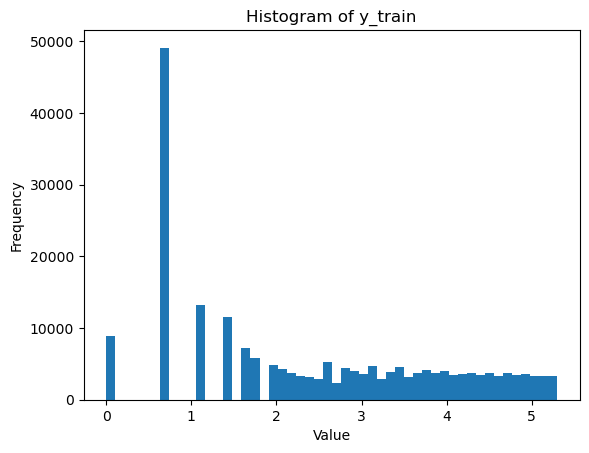

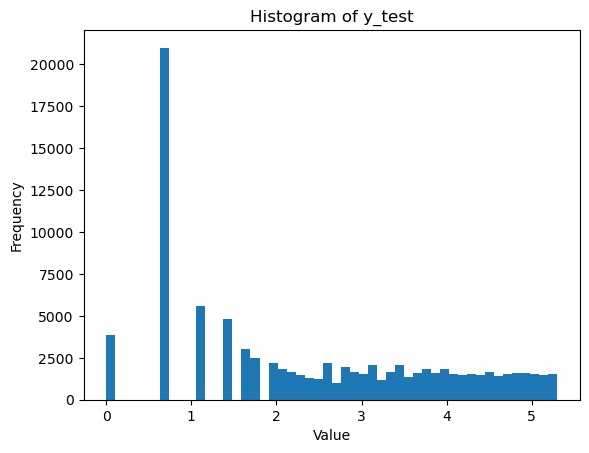

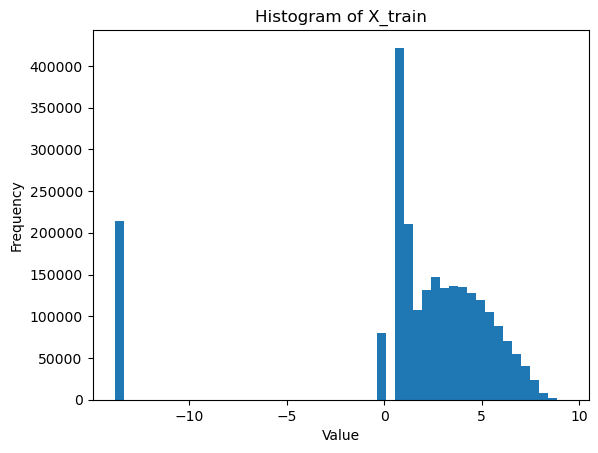

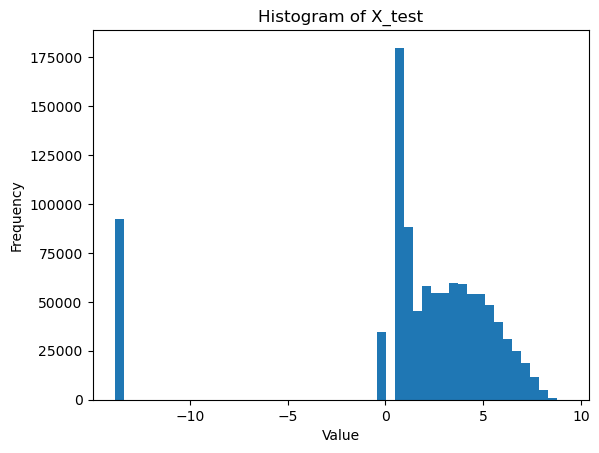

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用Matplotlib绘制直方图
plt.hist(y_train_processed.flatten(), bins=50)
plt.title('Histogram of y_train')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# 使用Matplotlib绘制直方图
plt.hist(y_test_processed.flatten(), bins=50)
plt.title('Histogram of y_test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 使用Matplotlib绘制直方图
plt.hist(X_train_processed[:, :, -1].flatten(), bins=50)
plt.title('Histogram of X_train')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# 使用Matplotlib绘制直方图
plt.hist(X_test_processed[:, :, -1].flatten(), bins=50)
plt.title('Histogram of X_test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


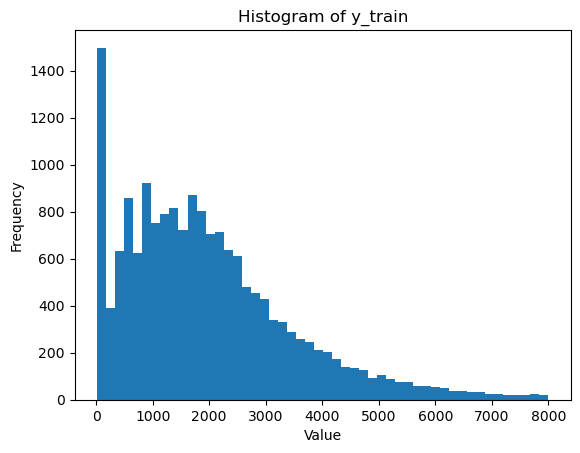

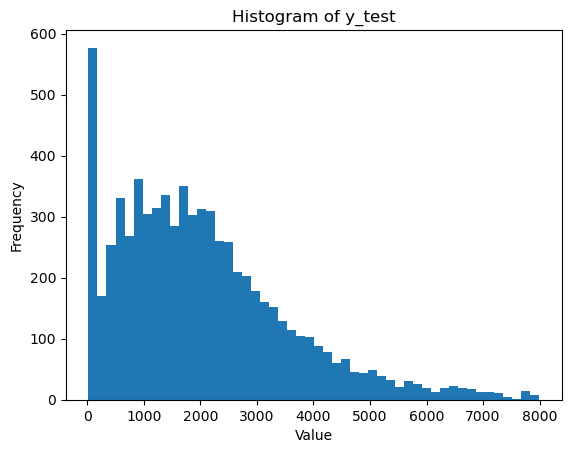

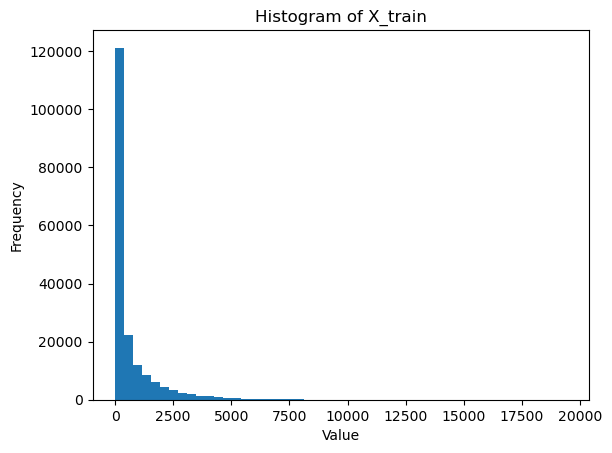

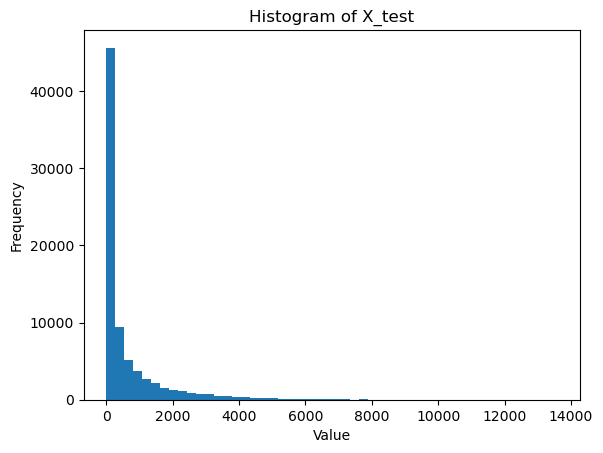

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用Matplotlib绘制直方图
plt.hist(y_train.flatten(), bins=50)
plt.title('Histogram of y_train')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# 使用Matplotlib绘制直方图
plt.hist(y_test.flatten(), bins=50)
plt.title('Histogram of y_test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 使用Matplotlib绘制直方图
plt.hist(X_train[:, :, -1].flatten(), bins=50)
plt.title('Histogram of X_train')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# 使用Matplotlib绘制直方图
plt.hist(X_test[:, :, -1].flatten(), bins=50)
plt.title('Histogram of X_test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### 模型


In [22]:
import torch
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, epsilon=1e-6):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        # 计算绝对误差
        loss = torch.abs(y_pred - y_true)
        
        # 计算焦点损失
        focal_loss = self.alpha * (1 - loss / (torch.abs(y_true) + self.epsilon))**self.gamma * loss
        return focal_loss.mean()


In [ ]:
class PositionalEncoding(nn.Module):
    
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :] # [input_window, batch size, embed dim]

class TransAm(nn.Module):
    def __init__(self, series_dim, feature_size = 80, num_layers=3, dropout=0.5):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.input_embedding = nn.Linear(series_dim, feature_size)
        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(feature_size, feature_size//2)
        self.out = nn.Linear(feature_size//2, series_dim)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        # 将解码器的权重初始化为均匀分布的随机值，范围在 [−0.1,0.1] 之间
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask
        src = self.input_embedding(src)
        src = self.pos_encoder(src) # [input_window, batch_size, feature_size]
        en_output = self.transformer_encoder(src, self.src_mask) 
        de_output = self.decoder(en_output) # [input_window, batch_size, feature_size//2]
        out_put = self.out(de_output[-output_window:,:,:])
        return out_put # [output_window, batch_size, series_dim]

    def _generate_square_subsequent_mask(self, sz):
        '''
        生成一个上三角掩码矩阵，防止模型在预测时看到未来时间步的数据。若 sz = 4 则生成：
        [[0.0,   -inf,  -inf,  -inf],
        [0.0,    0.0,  -inf,  -inf],
        [0.0,    0.0,   0.0,  -inf],
        [0.0,    0.0,   0.0,   0.0]]
        '''
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask
    
    

In [ ]:
# 模型
# LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_prob=0.5):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        self.c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

    def forward(self, x):
        # Initialize hidden state with zeros
        # h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # # Initialize cell state
        # c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Forward propagate LSTM
        out, (self.h0, self.c0) = self.lstm(x, (self.h0, self.c0))
        # Decode the hidden state of the last time step
        out = self.dropout(out[:, -1, :])  # Apply dropout before the fully connected layer
        out = self.fc(out)
        return out
        
# BiLSTM-MAIN model
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_size, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = hidden_size // num_heads
        assert hidden_size % num_heads == 0, "hidden_size must be divisible by num_heads"
        
        self.attention_heads = nn.Parameter(torch.Tensor(num_heads, self.head_dim, 1))
        nn.init.xavier_uniform_(self.attention_heads)
        
        self.fc = nn.Linear(hidden_size, hidden_size)

    def forward(self, lstm_output):
        batch_size, seq_len, hidden_size = lstm_output.size(0), lstm_output.size(1), lstm_output.size(2)
        # Reshape lstm_output to (batch_size, seq_len, num_heads, head_dim)
        lstm_output = lstm_output.view(batch_size, seq_len, self.num_heads, self.head_dim)
        # Transpose for matrix multiplication: (batch_size, num_heads, seq_len, head_dim)
        lstm_output = lstm_output.transpose(1, 2)
        # Compute attention scores
        attention_scores = torch.matmul(lstm_output, self.attention_heads)
        # Apply softmax to get the weights on the values
        attention_scores = F.softmax(attention_scores, dim=-2)
        # Apply attention weights to lstm_output
        weighted_output = attention_scores * lstm_output
        # Sum weighted output over seq_len dimension
        weighted_output = weighted_output.sum(dim=-2)
        # Reshape weighted_output to (batch_size, hidden_size)
        weighted_output = weighted_output.reshape(batch_size, -1)
        # Pass through the fully connected layer
        output = self.fc(weighted_output)
        return output

# BiLSTM-MAIN model
class LSTMWithMulAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate, num_heads):
        super(LSTMWithMulAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.attention = MultiHeadSelfAttention(hidden_size*2, num_heads)  # 注意hidden_size*2因为BiLSTM
        self.layer_norm = nn.LayerNorm(hidden_size*2)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size*2, num_classes)
        # 添加残差连接的线性层
        self.residual_fc = nn.Linear(hidden_size*2, hidden_size*2)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(x.device)  # 乘以2因为BiLSTM
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(x.device)
        lstm_out, _ = self.lstm(x, (h0, c0))
        # 添加残差连接
        residual_output = lstm_out + self.residual_fc(lstm_out)
        lstm_out = self.layer_norm(residual_output)
        attn_out = self.attention(lstm_out)
        drop_out = self.dropout(attn_out)
        out = self.fc(drop_out)
        return out

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Multi-Head Self-Attention
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_size, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        assert hidden_size % num_heads == 0, "hidden_size must be divisible by num_heads"

        self.num_heads = num_heads
        self.head_dim = hidden_size // num_heads
        self.scale = self.head_dim ** 0.5  # 缩放因子

        # 线性变换
        self.qkv_proj = nn.Linear(hidden_size, hidden_size * 3)
        self.fc_out = nn.Linear(hidden_size, hidden_size)

    def forward(self, lstm_output):
        batch_size, seq_len, hidden_size = lstm_output.shape
        
        # 线性变换得到 Q, K, V
        qkv = self.qkv_proj(lstm_output)  # (batch_size, seq_len, hidden_size * 3)
        q, k, v = torch.chunk(qkv, 3, dim=-1)  # 拆分成 Q, K, V

        # 变换为多头格式 (batch_size, num_heads, seq_len, head_dim)
        q = q.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        k = k.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        v = v.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)

        # 计算注意力分数 (batch_size, num_heads, seq_len, seq_len)
        attention_scores = torch.matmul(q, k.transpose(-2, -1)) / self.scale
        attention_weights = F.softmax(attention_scores, dim=-1)

        # 计算加权值 (batch_size, num_heads, seq_len, head_dim)
        attention_output = torch.matmul(attention_weights, v)

        # 合并多头 (batch_size, seq_len, hidden_size)
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, seq_len, hidden_size)

        # 通过全连接层
        output = self.fc_out(attention_output)
        return output

# BiLSTM + Multi-Head Attention
class LSTMWithMulAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate, num_heads):
        super(LSTMWithMulAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # BiLSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        # Multi-Head Attention
        self.attention = MultiHeadSelfAttention(hidden_size * 2, num_heads)  # 注意 BiLSTM 维度
        # 层归一化
        self.layer_norm = nn.LayerNorm(hidden_size * 2)
        # Dropout
        self.dropout = nn.Dropout(dropout_rate)
        # 全连接层
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        
        lstm_out, _ = self.lstm(x, (h0, c0))  # (batch_size, seq_len, hidden_size * 2)

        # 残差连接：直接 BiLSTM + Attention
        attn_out = self.attention(lstm_out)
        residual_output = lstm_out + attn_out  # 直接加
        lstm_out = self.layer_norm(residual_output)

        # Dropout + 输出层
        drop_out = self.dropout(lstm_out[:, -1, :])  # 取最后一个时间步
        out = self.fc(drop_out)
        return out


### 训练

d:\Software\anaconda3\envs\pytorch\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
train epoch 0: 100%|██████████| 838/838 [00:13<00:00, 62.90batch/s]


Epoch 1/500, Train Loss: 1.1009957913424917, Validation Loss: 1.0359637615918453 Current learning rate: 1e-05


train epoch 1: 100%|██████████| 838/838 [00:20<00:00, 41.14batch/s]


Epoch 2/500, Train Loss: 1.0155774753069535, Validation Loss: 1.0264148025301354 Current learning rate: 1e-05


train epoch 2: 100%|██████████| 838/838 [00:12<00:00, 65.70batch/s]


Epoch 3/500, Train Loss: 0.9951639792977484, Validation Loss: 1.0129197286519318 Current learning rate: 1e-05


train epoch 3: 100%|██████████| 838/838 [00:21<00:00, 39.30batch/s]


Epoch 4/500, Train Loss: 0.9814549048380095, Validation Loss: 1.0095539382372536 Current learning rate: 1e-05


train epoch 4: 100%|██████████| 838/838 [00:13<00:00, 61.85batch/s]


Epoch 5/500, Train Loss: 0.978369234712141, Validation Loss: 1.009305315252156 Current learning rate: 1e-05


train epoch 5: 100%|██████████| 838/838 [00:12<00:00, 67.46batch/s]


Epoch 6/500, Train Loss: 0.9771039430007588, Validation Loss: 1.0086331713397747 Current learning rate: 1e-05


train epoch 6: 100%|██████████| 838/838 [00:12<00:00, 67.45batch/s]


Epoch 7/500, Train Loss: 0.9762851299277923, Validation Loss: 1.0085207959456457 Current learning rate: 1e-05


train epoch 7: 100%|██████████| 838/838 [00:12<00:00, 67.55batch/s]


Epoch 8/500, Train Loss: 0.9757645622713753, Validation Loss: 1.0085474230823754 Current learning rate: 1e-05
EarlyStopping counter: 1 out of 50


train epoch 8: 100%|██████████| 838/838 [00:12<00:00, 67.83batch/s]


Epoch 9/500, Train Loss: 0.9752573183779927, Validation Loss: 1.0084316612652133 Current learning rate: 1e-05


train epoch 9: 100%|██████████| 838/838 [00:12<00:00, 67.10batch/s]


Epoch 10/500, Train Loss: 0.9749166463770701, Validation Loss: 1.0082401494570385 Current learning rate: 1e-05


train epoch 10: 100%|██████████| 838/838 [00:12<00:00, 67.89batch/s]


Epoch 11/500, Train Loss: 0.9745824531183038, Validation Loss: 1.0078206406570869 Current learning rate: 1e-05


train epoch 11: 100%|██████████| 838/838 [00:12<00:00, 68.09batch/s]


Epoch 12/500, Train Loss: 0.9742440976522561, Validation Loss: 1.0077383220608545 Current learning rate: 1e-05


train epoch 12: 100%|██████████| 838/838 [00:12<00:00, 67.83batch/s]


Epoch 13/500, Train Loss: 0.9738683014627999, Validation Loss: 1.0072273177989963 Current learning rate: 1e-05


train epoch 13: 100%|██████████| 838/838 [00:12<00:00, 67.98batch/s]


Epoch 14/500, Train Loss: 0.9735326535715266, Validation Loss: 1.0071143338513506 Current learning rate: 1e-05


train epoch 14: 100%|██████████| 838/838 [00:12<00:00, 67.86batch/s]


Epoch 15/500, Train Loss: 0.9734109546944748, Validation Loss: 1.0069666858401325 Current learning rate: 1e-05


train epoch 15: 100%|██████████| 838/838 [00:12<00:00, 66.83batch/s]


Epoch 16/500, Train Loss: 0.9730086262584586, Validation Loss: 1.0066679209223084 Current learning rate: 1e-05


train epoch 16: 100%|██████████| 838/838 [00:12<00:00, 67.98batch/s]


Epoch 17/500, Train Loss: 0.9727190775721198, Validation Loss: 1.0060505434829443 Current learning rate: 1e-05


train epoch 17: 100%|██████████| 838/838 [00:12<00:00, 68.37batch/s]


Epoch 18/500, Train Loss: 0.9721634041135664, Validation Loss: 1.00556791815236 Current learning rate: 1e-05


train epoch 18: 100%|██████████| 838/838 [00:12<00:00, 67.89batch/s]


Epoch 19/500, Train Loss: 0.9716066305385569, Validation Loss: 1.0051769424343373 Current learning rate: 1e-05


train epoch 19: 100%|██████████| 838/838 [00:12<00:00, 67.66batch/s]


Epoch 20/500, Train Loss: 0.9709230814315823, Validation Loss: 1.0044412934260025 Current learning rate: 1e-05


train epoch 20: 100%|██████████| 838/838 [00:12<00:00, 66.97batch/s]


Epoch 21/500, Train Loss: 0.9701883835731372, Validation Loss: 1.0038348600227087 Current learning rate: 1e-05


train epoch 21: 100%|██████████| 838/838 [00:12<00:00, 68.10batch/s]


Epoch 22/500, Train Loss: 0.9694108122555196, Validation Loss: 1.0027597435747488 Current learning rate: 1e-05


train epoch 22: 100%|██████████| 838/838 [00:12<00:00, 67.67batch/s]


Epoch 23/500, Train Loss: 0.9685908556429043, Validation Loss: 1.0016459046019413 Current learning rate: 1e-05


train epoch 23: 100%|██████████| 838/838 [00:12<00:00, 67.35batch/s]


Epoch 24/500, Train Loss: 0.9672192767760349, Validation Loss: 1.0001247535121738 Current learning rate: 1e-05


train epoch 24: 100%|██████████| 838/838 [00:12<00:00, 67.91batch/s]


Epoch 25/500, Train Loss: 0.9658115585212349, Validation Loss: 0.998131968803353 Current learning rate: 1e-05


train epoch 25: 100%|██████████| 838/838 [00:12<00:00, 66.83batch/s]


Epoch 26/500, Train Loss: 0.9638202049033738, Validation Loss: 0.9962421248452815 Current learning rate: 1e-05


train epoch 26: 100%|██████████| 838/838 [00:12<00:00, 66.55batch/s]


Epoch 27/500, Train Loss: 0.96224151164969, Validation Loss: 0.9944509753229875 Current learning rate: 1e-05


train epoch 27: 100%|██████████| 838/838 [00:12<00:00, 66.91batch/s]


Epoch 28/500, Train Loss: 0.9600423860912676, Validation Loss: 0.9917693428303066 Current learning rate: 1e-05


train epoch 28: 100%|██████████| 838/838 [00:12<00:00, 67.48batch/s]


Epoch 29/500, Train Loss: 0.957758682013127, Validation Loss: 0.9890304351447362 Current learning rate: 1e-05


train epoch 29: 100%|██████████| 838/838 [00:12<00:00, 67.35batch/s]


Epoch 30/500, Train Loss: 0.9548680373336365, Validation Loss: 0.9858730763114391 Current learning rate: 1e-05


train epoch 30: 100%|██████████| 838/838 [00:12<00:00, 67.08batch/s]


Epoch 31/500, Train Loss: 0.9517704259808707, Validation Loss: 0.9824364865998482 Current learning rate: 1e-05


train epoch 31: 100%|██████████| 838/838 [00:12<00:00, 66.81batch/s]


Epoch 32/500, Train Loss: 0.9481247158761098, Validation Loss: 0.9786890522471096 Current learning rate: 1e-05


train epoch 32: 100%|██████████| 838/838 [00:12<00:00, 67.70batch/s]


Epoch 33/500, Train Loss: 0.9439733271844917, Validation Loss: 0.9739331430923245 Current learning rate: 1e-05


train epoch 33: 100%|██████████| 838/838 [00:12<00:00, 67.65batch/s]


Epoch 34/500, Train Loss: 0.9383362111566602, Validation Loss: 0.9669971857374725 Current learning rate: 1e-05


train epoch 34: 100%|██████████| 838/838 [00:12<00:00, 66.85batch/s]


Epoch 35/500, Train Loss: 0.9305939363462401, Validation Loss: 0.9581496070379035 Current learning rate: 1e-05


train epoch 35: 100%|██████████| 838/838 [00:12<00:00, 67.82batch/s]


Epoch 36/500, Train Loss: 0.9213669655893469, Validation Loss: 0.9489176871043493 Current learning rate: 1e-05


train epoch 36: 100%|██████████| 838/838 [00:12<00:00, 68.58batch/s]


Epoch 37/500, Train Loss: 0.9131482020020485, Validation Loss: 0.9408765906400958 Current learning rate: 1e-05


train epoch 37: 100%|██████████| 838/838 [00:12<00:00, 67.70batch/s]


Epoch 38/500, Train Loss: 0.9059057100042522, Validation Loss: 0.9362840694568825 Current learning rate: 1e-05


train epoch 38: 100%|██████████| 838/838 [00:12<00:00, 68.36batch/s]


Epoch 39/500, Train Loss: 0.8998784894359283, Validation Loss: 0.9317640942879991 Current learning rate: 1e-05


train epoch 39: 100%|██████████| 838/838 [00:12<00:00, 68.23batch/s]


Epoch 40/500, Train Loss: 0.8949819399323982, Validation Loss: 0.9281686359908112 Current learning rate: 1e-05


train epoch 40: 100%|██████████| 838/838 [00:12<00:00, 68.41batch/s]


Epoch 41/500, Train Loss: 0.8900112641935275, Validation Loss: 0.9275905186532277 Current learning rate: 1e-05


train epoch 41: 100%|██████████| 838/838 [00:12<00:00, 66.37batch/s]


Epoch 42/500, Train Loss: 0.8846975266666713, Validation Loss: 0.9249316426690596 Current learning rate: 1e-05


train epoch 42: 100%|██████████| 838/838 [00:12<00:00, 68.26batch/s]


Epoch 43/500, Train Loss: 0.8807225923691843, Validation Loss: 0.9186484893974836 Current learning rate: 1e-05


train epoch 43: 100%|██████████| 838/838 [00:12<00:00, 69.04batch/s]


Epoch 44/500, Train Loss: 0.878084009846668, Validation Loss: 0.9191288878300183 Current learning rate: 1e-05
EarlyStopping counter: 2 out of 50


train epoch 44: 100%|██████████| 838/838 [00:12<00:00, 67.96batch/s]


Epoch 45/500, Train Loss: 0.8759268925109598, Validation Loss: 0.9163997404050299 Current learning rate: 1e-05


train epoch 45: 100%|██████████| 838/838 [00:12<00:00, 68.59batch/s]


Epoch 46/500, Train Loss: 0.8743217153505807, Validation Loss: 0.9138412026900004 Current learning rate: 1e-05


train epoch 46: 100%|██████████| 838/838 [00:12<00:00, 68.67batch/s]


Epoch 47/500, Train Loss: 0.8722951701244335, Validation Loss: 0.912764807755432 Current learning rate: 1e-05


train epoch 47: 100%|██████████| 838/838 [00:12<00:00, 67.88batch/s]


Epoch 48/500, Train Loss: 0.8705350069111315, Validation Loss: 0.9085823728230852 Current learning rate: 1e-05


train epoch 48: 100%|██████████| 838/838 [00:12<00:00, 67.98batch/s]


Epoch 49/500, Train Loss: 0.868903280015777, Validation Loss: 0.9038321700081271 Current learning rate: 1e-05


train epoch 49: 100%|██████████| 838/838 [00:12<00:00, 67.88batch/s]


Epoch 50/500, Train Loss: 0.8672804650906162, Validation Loss: 0.9066776681350869 Current learning rate: 1e-05
EarlyStopping counter: 3 out of 50


train epoch 50: 100%|██████████| 838/838 [00:12<00:00, 67.47batch/s]


Epoch 51/500, Train Loss: 0.8655399754465622, Validation Loss: 0.9001068494945682 Current learning rate: 1e-05


train epoch 51: 100%|██████████| 838/838 [00:12<00:00, 67.80batch/s]


Epoch 52/500, Train Loss: 0.8638352094782707, Validation Loss: 0.8976855421247905 Current learning rate: 1e-05


train epoch 52: 100%|██████████| 838/838 [00:12<00:00, 67.20batch/s]


Epoch 53/500, Train Loss: 0.8621326631873064, Validation Loss: 0.8948043178447066 Current learning rate: 1e-05


train epoch 53: 100%|██████████| 838/838 [00:12<00:00, 67.37batch/s]


Epoch 54/500, Train Loss: 0.8605689229288078, Validation Loss: 0.8929934144185191 Current learning rate: 1e-05


train epoch 54: 100%|██████████| 838/838 [00:12<00:00, 66.00batch/s]


Epoch 55/500, Train Loss: 0.8585364363980891, Validation Loss: 0.8898752293552058 Current learning rate: 1e-05


train epoch 55: 100%|██████████| 838/838 [00:12<00:00, 66.43batch/s]


Epoch 56/500, Train Loss: 0.8569692032931813, Validation Loss: 0.8880334884093409 Current learning rate: 1e-05


train epoch 56: 100%|██████████| 838/838 [00:12<00:00, 67.06batch/s]


Epoch 57/500, Train Loss: 0.8552134990745485, Validation Loss: 0.8885530968947424 Current learning rate: 1e-05
EarlyStopping counter: 4 out of 50


train epoch 57: 100%|██████████| 838/838 [00:13<00:00, 61.19batch/s]


Epoch 58/500, Train Loss: 0.8535328206910723, Validation Loss: 0.8848349576676652 Current learning rate: 1e-05


train epoch 58: 100%|██████████| 838/838 [00:22<00:00, 37.47batch/s]


Epoch 59/500, Train Loss: 0.8519204269232215, Validation Loss: 0.8837120107006168 Current learning rate: 1e-05


train epoch 59: 100%|██████████| 838/838 [00:22<00:00, 37.54batch/s]


Epoch 60/500, Train Loss: 0.8504875433722373, Validation Loss: 0.8822783533267037 Current learning rate: 1e-05


train epoch 60: 100%|██████████| 838/838 [00:21<00:00, 38.45batch/s]


Epoch 61/500, Train Loss: 0.8496153784609068, Validation Loss: 0.881330866315028 Current learning rate: 1e-05


train epoch 61: 100%|██████████| 838/838 [00:21<00:00, 38.41batch/s]


Epoch 62/500, Train Loss: 0.8484691572253346, Validation Loss: 0.879791873891598 Current learning rate: 1e-05


train epoch 62: 100%|██████████| 838/838 [00:22<00:00, 37.63batch/s]


Epoch 63/500, Train Loss: 0.8472793335917457, Validation Loss: 0.8780226013171706 Current learning rate: 1e-05


train epoch 63: 100%|██████████| 838/838 [00:21<00:00, 38.12batch/s]


Epoch 64/500, Train Loss: 0.8466239429672464, Validation Loss: 0.8769559391523992 Current learning rate: 1e-05


train epoch 64: 100%|██████████| 838/838 [00:21<00:00, 38.68batch/s]


Epoch 65/500, Train Loss: 0.8454995930621618, Validation Loss: 0.8778135651036313 Current learning rate: 1e-05
EarlyStopping counter: 5 out of 50


train epoch 65: 100%|██████████| 838/838 [00:22<00:00, 37.81batch/s]


Epoch 66/500, Train Loss: 0.8448271087253009, Validation Loss: 0.8741885140290551 Current learning rate: 1e-05


train epoch 66: 100%|██████████| 838/838 [00:22<00:00, 37.45batch/s]


Epoch 67/500, Train Loss: 0.8441555965469533, Validation Loss: 0.8750769963637614 Current learning rate: 1e-05
EarlyStopping counter: 6 out of 50


train epoch 67: 100%|██████████| 838/838 [00:22<00:00, 37.35batch/s]


Epoch 68/500, Train Loss: 0.8431549096982348, Validation Loss: 0.8733521388054224 Current learning rate: 1e-05


train epoch 68: 100%|██████████| 838/838 [00:22<00:00, 37.36batch/s]


Epoch 69/500, Train Loss: 0.8422656365556904, Validation Loss: 0.8728683199372318 Current learning rate: 1e-05


train epoch 69: 100%|██████████| 838/838 [00:22<00:00, 37.94batch/s]


Epoch 70/500, Train Loss: 0.8415989735317116, Validation Loss: 0.8710429695256859 Current learning rate: 1e-05


train epoch 70: 100%|██████████| 838/838 [00:22<00:00, 37.95batch/s]


Epoch 71/500, Train Loss: 0.8409036670795915, Validation Loss: 0.8717082420420779 Current learning rate: 1e-05
EarlyStopping counter: 7 out of 50


train epoch 71: 100%|██████████| 838/838 [00:21<00:00, 38.51batch/s]


Epoch 72/500, Train Loss: 0.8398958183113744, Validation Loss: 0.8691236621950472 Current learning rate: 1e-05


train epoch 72: 100%|██████████| 838/838 [00:22<00:00, 37.96batch/s]


Epoch 73/500, Train Loss: 0.8391221761258946, Validation Loss: 0.8687095260479774 Current learning rate: 1e-05


train epoch 73: 100%|██████████| 838/838 [00:22<00:00, 37.87batch/s]


Epoch 74/500, Train Loss: 0.8384793717725323, Validation Loss: 0.8680973025116233 Current learning rate: 1e-05


train epoch 74: 100%|██████████| 838/838 [00:22<00:00, 37.92batch/s]


Epoch 75/500, Train Loss: 0.8379273709256495, Validation Loss: 0.8667377776510168 Current learning rate: 1e-05


train epoch 75: 100%|██████████| 838/838 [00:21<00:00, 38.22batch/s]


Epoch 76/500, Train Loss: 0.8369930072071871, Validation Loss: 0.86681412915774 Current learning rate: 1e-05
EarlyStopping counter: 8 out of 50


train epoch 76: 100%|██████████| 838/838 [00:21<00:00, 38.13batch/s]


Epoch 77/500, Train Loss: 0.8364988730904738, Validation Loss: 0.8655130552989624 Current learning rate: 1e-05


train epoch 77: 100%|██████████| 838/838 [00:21<00:00, 38.14batch/s]


Epoch 78/500, Train Loss: 0.8359630583721015, Validation Loss: 0.8654893090396376 Current learning rate: 1e-05


train epoch 78: 100%|██████████| 838/838 [00:22<00:00, 37.68batch/s]


Epoch 79/500, Train Loss: 0.8353377849681565, Validation Loss: 0.8638562516120992 Current learning rate: 1e-05


train epoch 79: 100%|██████████| 838/838 [00:22<00:00, 37.59batch/s]


Epoch 80/500, Train Loss: 0.8348068021824651, Validation Loss: 0.8640839581550653 Current learning rate: 1e-05
EarlyStopping counter: 9 out of 50


train epoch 80: 100%|██████████| 838/838 [00:22<00:00, 37.46batch/s]


Epoch 81/500, Train Loss: 0.8338739432679013, Validation Loss: 0.8630211950380386 Current learning rate: 1e-05


train epoch 81: 100%|██████████| 838/838 [00:21<00:00, 38.10batch/s]


Epoch 82/500, Train Loss: 0.8333693257930882, Validation Loss: 0.8628019029042397 Current learning rate: 1e-05


train epoch 82: 100%|██████████| 838/838 [00:21<00:00, 38.20batch/s]


Epoch 83/500, Train Loss: 0.8327377018183114, Validation Loss: 0.8636681209847207 Current learning rate: 1e-05
EarlyStopping counter: 10 out of 50


train epoch 83: 100%|██████████| 838/838 [00:22<00:00, 37.96batch/s]


Epoch 84/500, Train Loss: 0.832402938625693, Validation Loss: 0.8627971274122967 Current learning rate: 1e-05


train epoch 84: 100%|██████████| 838/838 [00:22<00:00, 37.93batch/s]


Epoch 85/500, Train Loss: 0.8318775533509567, Validation Loss: 0.8608108400018922 Current learning rate: 1e-05


train epoch 85: 100%|██████████| 838/838 [00:21<00:00, 38.24batch/s]


Epoch 86/500, Train Loss: 0.8308594441552578, Validation Loss: 0.8592278045341579 Current learning rate: 1e-05


train epoch 86: 100%|██████████| 838/838 [00:21<00:00, 38.26batch/s]


Epoch 87/500, Train Loss: 0.8302556214707422, Validation Loss: 0.8601267326034998 Current learning rate: 1e-05
EarlyStopping counter: 11 out of 50


train epoch 87: 100%|██████████| 838/838 [00:21<00:00, 38.20batch/s]


Epoch 88/500, Train Loss: 0.8294460013651052, Validation Loss: 0.8582264014063119 Current learning rate: 1e-05


train epoch 88: 100%|██████████| 838/838 [00:21<00:00, 38.40batch/s]


Epoch 89/500, Train Loss: 0.8287568002548025, Validation Loss: 0.8569867282775631 Current learning rate: 1e-05


train epoch 89: 100%|██████████| 838/838 [00:21<00:00, 38.17batch/s]


Epoch 90/500, Train Loss: 0.82772458619427, Validation Loss: 0.8564670623545831 Current learning rate: 1e-05


train epoch 90: 100%|██████████| 838/838 [00:22<00:00, 37.98batch/s]


Epoch 91/500, Train Loss: 0.8270605418893346, Validation Loss: 0.8558006231515691 Current learning rate: 1e-05


train epoch 91: 100%|██████████| 838/838 [00:21<00:00, 38.41batch/s]


Epoch 92/500, Train Loss: 0.8263500589246112, Validation Loss: 0.8546101101712837 Current learning rate: 1e-05


train epoch 92: 100%|██████████| 838/838 [00:21<00:00, 38.29batch/s]


Epoch 93/500, Train Loss: 0.8256449375328272, Validation Loss: 0.8547993647012023 Current learning rate: 1e-05
EarlyStopping counter: 12 out of 50


train epoch 93: 100%|██████████| 838/838 [00:21<00:00, 38.43batch/s]


Epoch 94/500, Train Loss: 0.8249898806996733, Validation Loss: 0.8521876427605541 Current learning rate: 1e-05


train epoch 94: 100%|██████████| 838/838 [00:21<00:00, 38.19batch/s]


Epoch 95/500, Train Loss: 0.8241467525502378, Validation Loss: 0.8518234980073331 Current learning rate: 1e-05


train epoch 95: 100%|██████████| 838/838 [00:22<00:00, 37.75batch/s]


Epoch 96/500, Train Loss: 0.8237882828371053, Validation Loss: 0.8508921512234905 Current learning rate: 1e-05


train epoch 96: 100%|██████████| 838/838 [00:21<00:00, 38.64batch/s]


Epoch 97/500, Train Loss: 0.8229086580630703, Validation Loss: 0.849917013559315 Current learning rate: 1e-05


train epoch 97: 100%|██████████| 838/838 [00:22<00:00, 37.69batch/s]


Epoch 98/500, Train Loss: 0.8223388958322262, Validation Loss: 0.8492978772876005 Current learning rate: 1e-05


train epoch 98: 100%|██████████| 838/838 [00:21<00:00, 38.10batch/s]


Epoch 99/500, Train Loss: 0.8216656568440162, Validation Loss: 0.8483603296393833 Current learning rate: 1e-05


train epoch 99: 100%|██████████| 838/838 [00:21<00:00, 38.58batch/s]


Epoch 100/500, Train Loss: 0.8204862002576735, Validation Loss: 0.8474852013868638 Current learning rate: 1e-05


train epoch 100: 100%|██████████| 838/838 [00:21<00:00, 38.48batch/s]


Epoch 101/500, Train Loss: 0.819990389351344, Validation Loss: 0.8472779956426977 Current learning rate: 1e-05


train epoch 101: 100%|██████████| 838/838 [00:21<00:00, 38.30batch/s]


Epoch 102/500, Train Loss: 0.8191802390186486, Validation Loss: 0.8465519533015354 Current learning rate: 1e-05


train epoch 102: 100%|██████████| 838/838 [00:21<00:00, 38.16batch/s]


Epoch 103/500, Train Loss: 0.8188632978815452, Validation Loss: 0.8462967823499458 Current learning rate: 1e-05


train epoch 103: 100%|██████████| 838/838 [00:21<00:00, 38.22batch/s]


Epoch 104/500, Train Loss: 0.8180468459669189, Validation Loss: 0.8462849668229716 Current learning rate: 1e-05


train epoch 104: 100%|██████████| 838/838 [00:21<00:00, 38.25batch/s]


Epoch 105/500, Train Loss: 0.8172418553835594, Validation Loss: 0.8456323996103702 Current learning rate: 1e-05


train epoch 105: 100%|██████████| 838/838 [00:21<00:00, 38.26batch/s]


Epoch 106/500, Train Loss: 0.8165831155541546, Validation Loss: 0.8452177037203741 Current learning rate: 1e-05


train epoch 106: 100%|██████████| 838/838 [00:21<00:00, 38.46batch/s]


Epoch 107/500, Train Loss: 0.816341373127016, Validation Loss: 0.8446315580003809 Current learning rate: 1e-05


train epoch 107: 100%|██████████| 838/838 [00:22<00:00, 38.08batch/s]


Epoch 108/500, Train Loss: 0.815439716221538, Validation Loss: 0.8440617674812055 Current learning rate: 1e-05


train epoch 108: 100%|██████████| 838/838 [00:21<00:00, 38.15batch/s]


Epoch 109/500, Train Loss: 0.8149169261227217, Validation Loss: 0.8440347171267314 Current learning rate: 1e-05


train epoch 109: 100%|██████████| 838/838 [00:22<00:00, 37.75batch/s]


Epoch 110/500, Train Loss: 0.814359375589076, Validation Loss: 0.8435306948844415 Current learning rate: 1e-05


train epoch 110: 100%|██████████| 838/838 [00:21<00:00, 38.37batch/s]


Epoch 111/500, Train Loss: 0.8138895852931359, Validation Loss: 0.8429190886317858 Current learning rate: 1e-05


train epoch 111: 100%|██████████| 838/838 [00:22<00:00, 38.02batch/s]


Epoch 112/500, Train Loss: 0.8137616413269806, Validation Loss: 0.8428897523731406 Current learning rate: 1e-05


train epoch 112: 100%|██████████| 838/838 [00:21<00:00, 38.19batch/s]


Epoch 113/500, Train Loss: 0.8128475401381604, Validation Loss: 0.8430313500795008 Current learning rate: 1e-05
EarlyStopping counter: 13 out of 50


train epoch 113: 100%|██████████| 838/838 [00:21<00:00, 38.41batch/s]


Epoch 114/500, Train Loss: 0.8123242672986233, Validation Loss: 0.8421132466304335 Current learning rate: 1e-05


train epoch 114: 100%|██████████| 838/838 [00:21<00:00, 38.37batch/s]


Epoch 115/500, Train Loss: 0.812073775871628, Validation Loss: 0.8417846303319667 Current learning rate: 1e-05


train epoch 115: 100%|██████████| 838/838 [00:21<00:00, 38.33batch/s]


Epoch 116/500, Train Loss: 0.8115027930436385, Validation Loss: 0.8415306230950224 Current learning rate: 1e-05


train epoch 116: 100%|██████████| 838/838 [00:21<00:00, 38.40batch/s]


Epoch 117/500, Train Loss: 0.8110987982114772, Validation Loss: 0.8412252746501788 Current learning rate: 1e-05


train epoch 117: 100%|██████████| 838/838 [00:21<00:00, 38.14batch/s]


Epoch 118/500, Train Loss: 0.8106374774474944, Validation Loss: 0.8405308531509542 Current learning rate: 1e-05


train epoch 118: 100%|██████████| 838/838 [00:22<00:00, 38.07batch/s]


Epoch 119/500, Train Loss: 0.8104065320230043, Validation Loss: 0.840387584801526 Current learning rate: 1e-05


train epoch 119: 100%|██████████| 838/838 [00:21<00:00, 38.22batch/s]


Epoch 120/500, Train Loss: 0.8096372044616355, Validation Loss: 0.8397842874941404 Current learning rate: 1e-05


train epoch 120: 100%|██████████| 838/838 [00:21<00:00, 38.27batch/s]


Epoch 121/500, Train Loss: 0.8091620380205584, Validation Loss: 0.8394376005657492 Current learning rate: 1e-05


train epoch 121: 100%|██████████| 838/838 [00:21<00:00, 38.52batch/s]


Epoch 122/500, Train Loss: 0.8084552684856627, Validation Loss: 0.8394362253041479 Current learning rate: 1e-05


train epoch 122: 100%|██████████| 838/838 [00:22<00:00, 38.07batch/s]


Epoch 123/500, Train Loss: 0.8084989979614221, Validation Loss: 0.8392201691164204 Current learning rate: 1e-05


train epoch 123: 100%|██████████| 838/838 [00:22<00:00, 37.91batch/s]


Epoch 124/500, Train Loss: 0.8083823742545021, Validation Loss: 0.8385498391624303 Current learning rate: 1e-05


train epoch 124: 100%|██████████| 838/838 [00:22<00:00, 38.07batch/s]


Epoch 125/500, Train Loss: 0.8073450881178738, Validation Loss: 0.8390765670594086 Current learning rate: 1e-05
EarlyStopping counter: 14 out of 50


train epoch 125: 100%|██████████| 838/838 [00:22<00:00, 37.71batch/s]


Epoch 126/500, Train Loss: 0.8068470631977255, Validation Loss: 0.8383091439872237 Current learning rate: 1e-05


train epoch 126: 100%|██████████| 838/838 [00:22<00:00, 38.07batch/s]


Epoch 127/500, Train Loss: 0.806227115536362, Validation Loss: 0.8378433748625652 Current learning rate: 1e-05


train epoch 127: 100%|██████████| 838/838 [00:21<00:00, 38.27batch/s]


Epoch 128/500, Train Loss: 0.8056425321802746, Validation Loss: 0.8373099464995379 Current learning rate: 1e-05


train epoch 128: 100%|██████████| 838/838 [00:21<00:00, 38.45batch/s]


Epoch 129/500, Train Loss: 0.8047311479105728, Validation Loss: 0.835526431531457 Current learning rate: 1e-05


train epoch 129: 100%|██████████| 838/838 [00:21<00:00, 38.35batch/s]


Epoch 130/500, Train Loss: 0.8048126424144874, Validation Loss: 0.8354490184511504 Current learning rate: 1e-05


train epoch 130: 100%|██████████| 838/838 [00:21<00:00, 38.16batch/s]


Epoch 131/500, Train Loss: 0.8037437645091646, Validation Loss: 0.8351078783252233 Current learning rate: 1e-05


train epoch 131: 100%|██████████| 838/838 [00:21<00:00, 38.60batch/s]


Epoch 132/500, Train Loss: 0.8034912244570142, Validation Loss: 0.8345117398700226 Current learning rate: 1e-05


train epoch 132: 100%|██████████| 838/838 [00:21<00:00, 38.51batch/s]


Epoch 133/500, Train Loss: 0.8026158004856906, Validation Loss: 0.8350118193311044 Current learning rate: 1e-05
EarlyStopping counter: 15 out of 50


train epoch 133: 100%|██████████| 838/838 [00:21<00:00, 38.40batch/s]


Epoch 134/500, Train Loss: 0.802445699676409, Validation Loss: 0.8337536753255905 Current learning rate: 1e-05


train epoch 134: 100%|██████████| 838/838 [00:21<00:00, 38.53batch/s]


Epoch 135/500, Train Loss: 0.8016789270596032, Validation Loss: 0.8330061191130543 Current learning rate: 1e-05


train epoch 135: 100%|██████████| 838/838 [00:22<00:00, 37.72batch/s]


Epoch 136/500, Train Loss: 0.8010046788022314, Validation Loss: 0.832906231015838 Current learning rate: 1e-05


train epoch 136: 100%|██████████| 838/838 [00:21<00:00, 38.29batch/s]


Epoch 137/500, Train Loss: 0.8004703434153075, Validation Loss: 0.832998187691386 Current learning rate: 1e-05
EarlyStopping counter: 16 out of 50


train epoch 137: 100%|██████████| 838/838 [00:21<00:00, 38.56batch/s]


Epoch 138/500, Train Loss: 0.7999764365946478, Validation Loss: 0.8306127383768394 Current learning rate: 1e-05


train epoch 138: 100%|██████████| 838/838 [00:21<00:00, 38.63batch/s]


Epoch 139/500, Train Loss: 0.7994822085454953, Validation Loss: 0.8293152936112518 Current learning rate: 1e-05


train epoch 139: 100%|██████████| 838/838 [00:21<00:00, 38.92batch/s]


Epoch 140/500, Train Loss: 0.7985413565093692, Validation Loss: 0.8287745956073508 Current learning rate: 1e-05


train epoch 140: 100%|██████████| 838/838 [00:21<00:00, 38.45batch/s]


Epoch 141/500, Train Loss: 0.7976078265446609, Validation Loss: 0.8281269869315657 Current learning rate: 1e-05


train epoch 141: 100%|██████████| 838/838 [00:21<00:00, 38.58batch/s]


Epoch 142/500, Train Loss: 0.7970175744792299, Validation Loss: 0.8271259659091191 Current learning rate: 1e-05


train epoch 142: 100%|██████████| 838/838 [00:21<00:00, 38.89batch/s]


Epoch 143/500, Train Loss: 0.7965472503909774, Validation Loss: 0.8277880098887428 Current learning rate: 1e-05
EarlyStopping counter: 17 out of 50


train epoch 143: 100%|██████████| 838/838 [00:21<00:00, 38.76batch/s]


Epoch 144/500, Train Loss: 0.7958257015803406, Validation Loss: 0.8259059116450703 Current learning rate: 1e-05


train epoch 144: 100%|██████████| 838/838 [00:22<00:00, 37.78batch/s]


Epoch 145/500, Train Loss: 0.7944372084374075, Validation Loss: 0.8251927889821602 Current learning rate: 1e-05


train epoch 145: 100%|██████████| 838/838 [00:21<00:00, 38.82batch/s]


Epoch 146/500, Train Loss: 0.7940138499997111, Validation Loss: 0.8243413511405692 Current learning rate: 1e-05


train epoch 146: 100%|██████████| 838/838 [00:22<00:00, 38.09batch/s]


Epoch 147/500, Train Loss: 0.7930195830886859, Validation Loss: 0.823637924304134 Current learning rate: 1e-05


train epoch 147: 100%|██████████| 838/838 [00:21<00:00, 38.17batch/s]


Epoch 148/500, Train Loss: 0.7926703890727784, Validation Loss: 0.8236330078084053 Current learning rate: 1e-05


train epoch 148: 100%|██████████| 838/838 [00:21<00:00, 38.54batch/s]


Epoch 149/500, Train Loss: 0.7917710335342867, Validation Loss: 0.8219490954007468 Current learning rate: 1e-05


train epoch 149: 100%|██████████| 838/838 [00:21<00:00, 38.91batch/s]


Epoch 150/500, Train Loss: 0.7911479601231992, Validation Loss: 0.8219555291525215 Current learning rate: 1e-05
EarlyStopping counter: 18 out of 50


train epoch 150: 100%|██████████| 838/838 [00:21<00:00, 38.71batch/s]


Epoch 151/500, Train Loss: 0.7899334365968772, Validation Loss: 0.8208546400524243 Current learning rate: 1e-05


train epoch 151: 100%|██████████| 838/838 [00:21<00:00, 38.34batch/s]


Epoch 152/500, Train Loss: 0.7889439194576553, Validation Loss: 0.8235386134308461 Current learning rate: 1e-05
EarlyStopping counter: 19 out of 50


train epoch 152: 100%|██████████| 838/838 [00:21<00:00, 38.58batch/s]


Epoch 153/500, Train Loss: 0.7884555059109497, Validation Loss: 0.8194720690806817 Current learning rate: 1e-05


train epoch 153: 100%|██████████| 838/838 [00:21<00:00, 38.89batch/s]


Epoch 154/500, Train Loss: 0.7872596396164422, Validation Loss: 0.8186376154670425 Current learning rate: 1e-05


train epoch 154: 100%|██████████| 838/838 [00:21<00:00, 38.93batch/s]


Epoch 155/500, Train Loss: 0.7863472730259196, Validation Loss: 0.8176897589189525 Current learning rate: 1e-05


train epoch 155: 100%|██████████| 838/838 [00:21<00:00, 38.41batch/s]


Epoch 156/500, Train Loss: 0.7849869598903491, Validation Loss: 0.8168102043817578 Current learning rate: 1e-05


train epoch 156: 100%|██████████| 838/838 [00:21<00:00, 38.89batch/s]


Epoch 157/500, Train Loss: 0.784698804160291, Validation Loss: 0.816868785902899 Current learning rate: 1e-05
EarlyStopping counter: 20 out of 50


train epoch 157: 100%|██████████| 838/838 [00:21<00:00, 38.97batch/s]


Epoch 158/500, Train Loss: 0.7835794181645201, Validation Loss: 0.8181806799653825 Current learning rate: 1e-05
EarlyStopping counter: 21 out of 50


train epoch 158: 100%|██████████| 838/838 [00:21<00:00, 38.47batch/s]


Epoch 159/500, Train Loss: 0.7822373854729896, Validation Loss: 0.8168955055217664 Current learning rate: 1e-05
EarlyStopping counter: 22 out of 50


train epoch 159: 100%|██████████| 838/838 [00:21<00:00, 38.57batch/s]


Epoch 160/500, Train Loss: 0.7824024882941086, Validation Loss: 0.815185771217967 Current learning rate: 1e-05


train epoch 160: 100%|██████████| 838/838 [00:21<00:00, 38.60batch/s]


Epoch 161/500, Train Loss: 0.7809632899759777, Validation Loss: 0.812990046542272 Current learning rate: 1e-05


train epoch 161: 100%|██████████| 838/838 [00:21<00:00, 38.75batch/s]


Epoch 162/500, Train Loss: 0.779707164576984, Validation Loss: 0.8113365846575132 Current learning rate: 1e-05


train epoch 162: 100%|██████████| 838/838 [00:21<00:00, 38.46batch/s]


Epoch 163/500, Train Loss: 0.7804513304518771, Validation Loss: 0.8115555041797273 Current learning rate: 1e-05
EarlyStopping counter: 23 out of 50


train epoch 163: 100%|██████████| 838/838 [00:21<00:00, 38.27batch/s]


Epoch 164/500, Train Loss: 0.7791240250776235, Validation Loss: 0.8087999478312741 Current learning rate: 1e-05


train epoch 164: 100%|██████████| 838/838 [00:21<00:00, 38.69batch/s]


Epoch 165/500, Train Loss: 0.7774531859860073, Validation Loss: 0.8095276956949538 Current learning rate: 1e-05
EarlyStopping counter: 24 out of 50


train epoch 165: 100%|██████████| 838/838 [00:21<00:00, 38.49batch/s]


Epoch 166/500, Train Loss: 0.7753589870697132, Validation Loss: 0.8087085713929086 Current learning rate: 1e-05


train epoch 166: 100%|██████████| 838/838 [00:21<00:00, 38.20batch/s]


Epoch 167/500, Train Loss: 0.7747703228048037, Validation Loss: 0.8078510965584388 Current learning rate: 1e-05


train epoch 167: 100%|██████████| 838/838 [00:21<00:00, 38.32batch/s]


Epoch 168/500, Train Loss: 0.7738437435383018, Validation Loss: 0.8088851258406349 Current learning rate: 1e-05
EarlyStopping counter: 25 out of 50


train epoch 168: 100%|██████████| 838/838 [00:21<00:00, 38.46batch/s]


Epoch 169/500, Train Loss: 0.7715114169178402, Validation Loss: 0.808150576814555 Current learning rate: 1e-05
EarlyStopping counter: 26 out of 50


train epoch 169: 100%|██████████| 838/838 [00:22<00:00, 38.07batch/s]


Epoch 170/500, Train Loss: 0.7710096369761983, Validation Loss: 0.8095562553595638 Current learning rate: 1e-05
EarlyStopping counter: 27 out of 50


train epoch 170: 100%|██████████| 838/838 [00:21<00:00, 38.16batch/s]


Epoch 171/500, Train Loss: 0.771594986123942, Validation Loss: 0.8017627401406415 Current learning rate: 1e-05


train epoch 171: 100%|██████████| 838/838 [00:21<00:00, 38.33batch/s]


Epoch 172/500, Train Loss: 0.77513321276603, Validation Loss: 0.8031063198506667 Current learning rate: 1e-05
EarlyStopping counter: 28 out of 50


train epoch 172: 100%|██████████| 838/838 [00:22<00:00, 37.81batch/s]


Epoch 173/500, Train Loss: 0.7694404867426592, Validation Loss: 0.8014740384805565 Current learning rate: 1e-05


train epoch 173: 100%|██████████| 838/838 [00:21<00:00, 38.34batch/s]


Epoch 174/500, Train Loss: 0.77044871865565, Validation Loss: 0.8005946119447495 Current learning rate: 1e-05


train epoch 174: 100%|██████████| 838/838 [00:21<00:00, 38.22batch/s]


Epoch 175/500, Train Loss: 0.7678787681609748, Validation Loss: 0.7980466206607065 Current learning rate: 1e-05


train epoch 175: 100%|██████████| 838/838 [00:21<00:00, 38.27batch/s]


Epoch 176/500, Train Loss: 0.7668978664001588, Validation Loss: 0.7979549433096954 Current learning rate: 1e-05


train epoch 176: 100%|██████████| 838/838 [00:21<00:00, 38.24batch/s]


Epoch 177/500, Train Loss: 0.766462002354085, Validation Loss: 0.7969821711739015 Current learning rate: 1e-05


train epoch 177: 100%|██████████| 838/838 [00:21<00:00, 38.33batch/s]


Epoch 178/500, Train Loss: 0.7677778066413784, Validation Loss: 0.7969807475970393 Current learning rate: 1e-05


train epoch 178: 100%|██████████| 838/838 [00:21<00:00, 38.44batch/s]


Epoch 179/500, Train Loss: 0.7735615358699051, Validation Loss: 0.7951933188864398 Current learning rate: 1e-05


train epoch 179: 100%|██████████| 838/838 [00:21<00:00, 38.70batch/s]


Epoch 180/500, Train Loss: 0.7642983032172648, Validation Loss: 0.7943332352549085 Current learning rate: 1e-05


train epoch 180: 100%|██████████| 838/838 [00:21<00:00, 38.56batch/s]


Epoch 181/500, Train Loss: 0.7636668326550993, Validation Loss: 0.7933099992222403 Current learning rate: 1e-05


train epoch 181: 100%|██████████| 838/838 [00:21<00:00, 38.65batch/s]


Epoch 182/500, Train Loss: 0.7625897738433539, Validation Loss: 0.7942368390652612 Current learning rate: 1e-05
EarlyStopping counter: 29 out of 50


train epoch 182: 100%|██████████| 838/838 [00:21<00:00, 38.41batch/s]


Epoch 183/500, Train Loss: 0.7623144512849378, Validation Loss: 0.7934901637548886 Current learning rate: 1e-05
EarlyStopping counter: 30 out of 50


train epoch 183: 100%|██████████| 838/838 [00:22<00:00, 38.00batch/s]


Epoch 184/500, Train Loss: 0.7613501444121107, Validation Loss: 0.7928283625898929 Current learning rate: 1e-05


train epoch 184: 100%|██████████| 838/838 [00:21<00:00, 38.13batch/s]


Epoch 185/500, Train Loss: 0.7604885944354222, Validation Loss: 0.7940008282413773 Current learning rate: 1e-05
EarlyStopping counter: 31 out of 50


train epoch 185: 100%|██████████| 838/838 [00:21<00:00, 38.83batch/s]


Epoch 186/500, Train Loss: 0.7612995498709221, Validation Loss: 0.7914947633143937 Current learning rate: 1e-05


train epoch 186: 100%|██████████| 838/838 [00:22<00:00, 38.02batch/s]


Epoch 187/500, Train Loss: 0.760369390284816, Validation Loss: 0.7928655761141856 Current learning rate: 1e-05
EarlyStopping counter: 32 out of 50


train epoch 187: 100%|██████████| 838/838 [00:21<00:00, 38.44batch/s]


Epoch 188/500, Train Loss: 0.7592149213232047, Validation Loss: 0.7933671625945047 Current learning rate: 1e-05
EarlyStopping counter: 33 out of 50


train epoch 188: 100%|██████████| 838/838 [00:21<00:00, 38.18batch/s]


Epoch 189/500, Train Loss: 0.758601813068111, Validation Loss: 0.7944634964591578 Current learning rate: 1e-05
EarlyStopping counter: 34 out of 50


train epoch 189: 100%|██████████| 838/838 [00:21<00:00, 38.63batch/s]


Epoch 190/500, Train Loss: 0.7579123074708947, Validation Loss: 0.7918891407487465 Current learning rate: 1e-05
EarlyStopping counter: 35 out of 50


train epoch 190: 100%|██████████| 838/838 [00:21<00:00, 38.81batch/s]


Epoch 191/500, Train Loss: 0.7565836454774998, Validation Loss: 0.7909240817594396 Current learning rate: 1e-05


train epoch 191: 100%|██████████| 838/838 [00:21<00:00, 39.11batch/s]


Epoch 192/500, Train Loss: 0.7553641938900038, Validation Loss: 0.79069835110632 Current learning rate: 1e-05


train epoch 192: 100%|██████████| 838/838 [00:21<00:00, 38.91batch/s]


Epoch 193/500, Train Loss: 0.7544657242682213, Validation Loss: 0.78939357164659 Current learning rate: 1e-05


train epoch 193: 100%|██████████| 838/838 [00:21<00:00, 38.60batch/s]


Epoch 194/500, Train Loss: 0.7535843851671583, Validation Loss: 0.7895016106789793 Current learning rate: 1e-05
EarlyStopping counter: 36 out of 50


train epoch 194: 100%|██████████| 838/838 [00:21<00:00, 38.31batch/s]


Epoch 195/500, Train Loss: 0.7544668191390419, Validation Loss: 0.7933045176794324 Current learning rate: 1e-05
EarlyStopping counter: 37 out of 50


train epoch 195: 100%|██████████| 838/838 [00:21<00:00, 38.35batch/s]


Epoch 196/500, Train Loss: 0.7533445962324632, Validation Loss: 0.7877505430719529 Current learning rate: 1e-05


train epoch 196: 100%|██████████| 838/838 [00:21<00:00, 39.03batch/s]


Epoch 197/500, Train Loss: 0.751914358393318, Validation Loss: 0.7876887390611905 Current learning rate: 1e-05


train epoch 197: 100%|██████████| 838/838 [00:21<00:00, 38.81batch/s]


Epoch 198/500, Train Loss: 0.7528002428019815, Validation Loss: 0.7881756116974057 Current learning rate: 1e-05
EarlyStopping counter: 38 out of 50


train epoch 198: 100%|██████████| 838/838 [00:21<00:00, 38.54batch/s]


Epoch 199/500, Train Loss: 0.7513062114024931, Validation Loss: 0.7870503177974693 Current learning rate: 1e-05


train epoch 199: 100%|██████████| 838/838 [00:21<00:00, 38.36batch/s]


Epoch 200/500, Train Loss: 0.7512477072742645, Validation Loss: 0.7876670034266905 Current learning rate: 1e-05
EarlyStopping counter: 39 out of 50


train epoch 200: 100%|██████████| 838/838 [00:21<00:00, 39.00batch/s]


Epoch 201/500, Train Loss: 0.7503528879835384, Validation Loss: 0.7858747221178626 Current learning rate: 1e-05


train epoch 201: 100%|██████████| 838/838 [00:21<00:00, 38.62batch/s]


Epoch 202/500, Train Loss: 0.7497440356058835, Validation Loss: 0.7861808266418462 Current learning rate: 1e-05
EarlyStopping counter: 40 out of 50


train epoch 202: 100%|██████████| 838/838 [00:21<00:00, 38.42batch/s]


Epoch 203/500, Train Loss: 0.7501482061312705, Validation Loss: 0.786395420596375 Current learning rate: 1e-05
EarlyStopping counter: 41 out of 50


train epoch 203: 100%|██████████| 838/838 [00:21<00:00, 38.30batch/s]


Epoch 204/500, Train Loss: 0.7501776215747035, Validation Loss: 0.7882578691823661 Current learning rate: 1e-05
EarlyStopping counter: 42 out of 50


train epoch 204: 100%|██████████| 838/838 [00:21<00:00, 38.56batch/s]


Epoch 205/500, Train Loss: 0.7500172697612237, Validation Loss: 0.7874649565801066 Current learning rate: 1e-05
EarlyStopping counter: 43 out of 50


train epoch 205: 100%|██████████| 838/838 [00:21<00:00, 38.73batch/s]


Epoch 206/500, Train Loss: 0.7493322495024358, Validation Loss: 0.7884206188187375 Current learning rate: 1e-05
EarlyStopping counter: 44 out of 50


train epoch 206: 100%|██████████| 838/838 [00:21<00:00, 38.81batch/s]


Epoch 207/500, Train Loss: 0.74829578035131, Validation Loss: 0.7871188494554847 Current learning rate: 1e-05
EarlyStopping counter: 45 out of 50


train epoch 207: 100%|██████████| 838/838 [00:21<00:00, 38.94batch/s]


Epoch 208/500, Train Loss: 0.7469656107444894, Validation Loss: 0.7861128836416141 Current learning rate: 1e-05
EarlyStopping counter: 46 out of 50


train epoch 208: 100%|██████████| 838/838 [00:21<00:00, 38.38batch/s]


Epoch 209/500, Train Loss: 0.746913035935889, Validation Loss: 0.7850624322478461 Current learning rate: 1e-05


train epoch 209: 100%|██████████| 838/838 [00:21<00:00, 38.66batch/s]


Epoch 210/500, Train Loss: 0.747789103146598, Validation Loss: 0.7852876348178472 Current learning rate: 1e-05
EarlyStopping counter: 47 out of 50


train epoch 210: 100%|██████████| 838/838 [00:21<00:00, 38.57batch/s]


Epoch 211/500, Train Loss: 0.7473400062247932, Validation Loss: 0.7877074864556255 Current learning rate: 1e-05
EarlyStopping counter: 48 out of 50


train epoch 211: 100%|██████████| 838/838 [00:21<00:00, 38.83batch/s]


Epoch 212/500, Train Loss: 0.7463097911514787, Validation Loss: 0.7874480932744586 Current learning rate: 1e-05
EarlyStopping counter: 49 out of 50


train epoch 212: 100%|██████████| 838/838 [00:21<00:00, 38.28batch/s]


Epoch 213/500, Train Loss: 0.7457067574727791, Validation Loss: 0.7907469355581209 Current learning rate: 1e-05
EarlyStopping counter: 50 out of 50
Early stopping


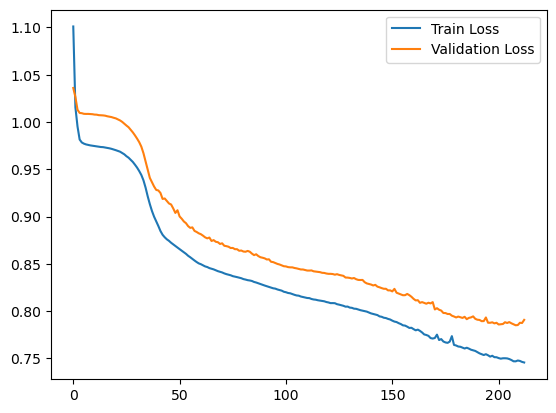

Epoch 213/500, Train Loss: 0.7457067574727791, Validation Loss: 0.7907469355581209
Test RMSE: 0.88588184
CPU times: total: 32min
Wall time: 1h 20min 9s


In [44]:
%%time
from torch.nn.parallel import DataParallel
import torch.nn.functional as F

hidden_size = 256
num_layers = 8
batch_size = 256
sequence_length = 11

train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)


# print('X_train.shape[-1]:',X_train.shape[-1])

input_size = 4
num_classes= 1
# model = LSTM(input_size, hidden_size, num_layers, num_classes, dropout_prob=0.5)
#model = LSTMWithAttention(input_size, hidden_size, num_layers, num_classes, dropout_rate = 0.2)
model = LSTMWithMulAttention(input_size, hidden_size, num_layers, num_classes, dropout_rate=0.4, num_heads=8)
# print('num_classes:', num_classes)

model = model.to(device)
model = nn.DataParallel(model)
criterion = nn.MSELoss() # FocalLoss(alpha=0.25, gamma=2) #nn.CrossEntropyLoss() #nn.MSELoss() #custom_loss 
optimizer = optim.Adam(model.parameters(), lr=1e-5)
scheduler = ReduceLROnPlateau(optimizer, 'min',factor=0.4, patience=10, min_lr=1e-7, verbose=True)

# 训练模型
num_epochs = 500
best_loss = np.inf
early_stopping_patience = 50
early_stopping_counter = 0
loss_values = []

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    for i, (x_batch, y_batch) in enumerate(tqdm(train_loader, desc=f"train epoch {epoch}" ,unit="batch")): #tqdm(train_loader, desc=f"train epoch {epoch}" ,unit="batch"))
        # one_batch_bar.set_description(f'[ epoch: {ep+1} ]')
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
#         print('x_batch:', x_batch.shape)
#         print('y_batch:', y_batch.shape)
        
        optimizer.zero_grad()
        # print('x_batch shape:',x_batch.shape[0])
        # print(x_batch.shape)
        x_batch = x_batch.view(-1, sequence_length, input_size)
        y_batch = y_batch.view(-1, num_classes)
        
        outputs = model(x_batch)
        # print('outputs:', outputs.shape)
        loss = criterion(outputs, y_batch) #, x_batch
        loss.backward()
        optimizer.step()
        # break
        train_losses.append(loss.item())
        # 更新进度条后缀信息，显示当前损失值
        # tqdm.set_postfix({'loss': loss / (100 * (epoch+1))}, refresh=True)
    
    val_losses = []
    model.eval()
    with torch.no_grad():
        # for i, (x_batch, y_batch) in enumerate(test_loader):
        for i, (x_batch, y_batch) in enumerate(test_loader):
            x_batch = x_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            
            x_batch = x_batch.view(-1, sequence_length, input_size)
            y_batch = y_batch.view(-1, num_classes)
            # y_batch = y_batch.squeeze().long()
            
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch) #, x_batch
            val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)
    scheduler.step(train_loss)
    loss_values.append([train_loss, val_loss])

    # if epoch%10==0 :
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}', "Current learning rate:", scheduler.get_last_lr()[0])
    # 在每个 epoch 结束时获取最后设置的学习率并打印

    if val_loss - best_loss < -0.000001:
        # early_stopping_counter = 0
        if best_loss - val_loss > 0.01:
            early_stopping_counter = 0
        best_loss = val_loss
        best_model = deepcopy(model.state_dict())
    else:
        early_stopping_counter += 1
        print(f'EarlyStopping counter: {early_stopping_counter} out of {early_stopping_patience}')
        if early_stopping_counter >= early_stopping_patience:
            model.load_state_dict(best_model)
            print('Early stopping')
            break

    # 保存最好的模型
    # torch.save(best_model, '../model/lstm1024_l8_T1500c20rsntMax_sst11.pth')#########################################################
model_name = 'v1mul256_l8_T1500n4_st2t_scaler'   #f'v1mul256_l4_T1500n4_s2s_minmax.pth'
# torch.save(best_model, '../model/v1mul256_l4_T1500n4_s2s_minmax.pth')
torch.save(best_model, f'../model/{model_name}.pth')

# 画出loss变化曲线
loss_values = np.array(loss_values)
plt.plot(loss_values[:, 0], label='Train Loss')
plt.plot(loss_values[:, 1], label='Validation Loss')
plt.legend()
plt.show()

# 评估预测结果
model.eval()
predictions = []
targets = []
with torch.no_grad():
    for i, (x_batch, y_batch) in enumerate(test_loader):
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        x_batch = x_batch.view(-1, sequence_length, input_size)
        y_batch = y_batch.view(-1, num_classes)
        outputs = model(x_batch)
        predictions.append(outputs.cpu().numpy())
        targets.append(y_batch.cpu().numpy()) 

predictions = np.concatenate(predictions)
targets = np.concatenate(targets) 
print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}')
print('Test RMSE:', np.sqrt(mean_squared_error(targets, predictions)))

#保存预测结果
np.savez(f'../results/{model_name}_test.npz', arr1=targets, arr2=predictions)

In [38]:
# 评估预测结果
model.eval()
train_targets = []
train_predictions = []
with torch.no_grad():
    for i, (x_batch, y_batch) in enumerate(train_loader):
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        x_batch = x_batch.view(-1, sequence_length, input_size)
        y_batch = y_batch.view(-1, num_classes)
        outputs = model(x_batch)
        train_predictions.append(outputs.cpu().numpy())
        train_targets.append(y_batch.cpu().numpy()) 

train_predictions = np.concatenate(train_predictions)
train_targets = np.concatenate(train_targets) 
# print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}')
print('Test RMSE:', np.sqrt(mean_squared_error(train_targets, train_predictions)))

Test RMSE: 1.1950557


In [39]:
predictions = []
targets = []
with torch.no_grad():
    for i, (x_batch, y_batch) in enumerate(test_loader):
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        x_batch = x_batch.view(-1, sequence_length, input_size)
        y_batch = y_batch.view(-1, num_classes)
        outputs = model(x_batch)
        predictions.append(outputs.cpu().numpy())
        targets.append(y_batch.cpu().numpy()) 

predictions = np.concatenate(predictions)
targets = np.concatenate(targets) 

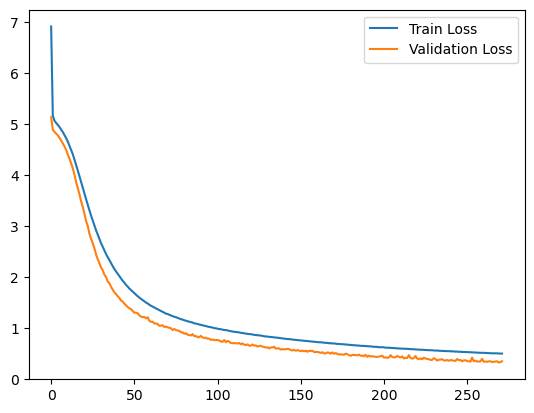

In [34]:
# 画出loss变化曲线
loss_values = np.array(loss_values)
plt.plot(loss_values[:, 0], label='Train Loss')
plt.plot(loss_values[:, 1], label='Validation Loss')
plt.legend()
plt.show()

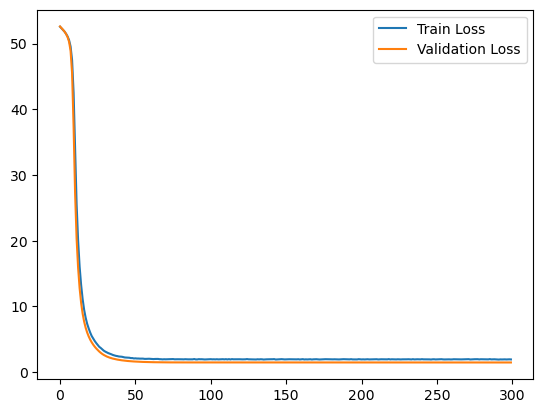

In [82]:
# 画出loss变化曲线
loss_values = np.array(loss_values)
plt.plot(loss_values[:, 0], label='Train Loss')
plt.plot(loss_values[:, 1], label='Validation Loss')
plt.legend()
plt.show()

### Evaluation

In [37]:
# 评估预测结果
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)
model.eval()
predictions = []
targets = []
with torch.no_grad():
    for i, (x_batch, y_batch) in enumerate(tqdm(test_loader, desc="test", unit="batch")):
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        x_batch = x_batch.view(-1, sequence_length+1, input_size)
        y_batch = y_batch.view(-1, num_classes)
        outputs = model(x_batch)
        predictions.append(outputs.cpu().numpy())
        targets.append(y_batch.cpu().numpy()) 

predictions = np.concatenate(predictions)
targets = np.concatenate(targets) 

test:   0%|          | 0/361 [00:00<?, ?batch/s]


RuntimeError: shape '[-1, 12, 4]' is invalid for input of size 11264

In [ ]:
# 数据转回原始尺度
predictions = scaler_y.inverse_transform(predictions)
targets = scaler_y.inverse_transform(targets)

In [24]:
# 数据转回非log
predictions = np.exp(predictions)
targets = np.exp(targets)

In [186]:
predictions[1], targets[1]

(array([2.61678], dtype=float32), array([1.7917596], dtype=float32))

In [92]:
predictions.shape, targets.shape

((264803, 3), (264803, 3))

In [ ]:
# predictions_s = predictions
# targets_s = targets
# predictions = predictions[:, :-1]
# targets = targets[:, :-1]

# predictions.shape, targets.shape

((264803, 3), (264803, 3))

#### 指标

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 四舍五入的
# pre_round = np.round(new_pred)
print('Test RMSE:', np.sqrt(mean_squared_error(targets, predictions)))
# 计算均方误差（MSE）
mse = mean_squared_error(targets, predictions)
print("Mean Squared Error (MSE):", mse)

# 计算平均绝对误差（MAE）
mae = mean_absolute_error(targets, predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算R平方
r2 = r2_score(targets, predictions)
print("R^2 Score:", r2)

Test RMSE: 1.2150384
Mean Squared Error (MSE): 1.4763182
Mean Absolute Error (MAE): 0.93758476
R^2 Score: 0.38345540139364676


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 四舍五入的
# pre_round = np.round(new_pred)
print('Test RMSE:', np.sqrt(mean_squared_error(targets, predictions)))
# 计算均方误差（MSE）
mse = mean_squared_error(targets, predictions)
print("Mean Squared Error (MSE):", mse)

# 计算平均绝对误差（MAE）
mae = mean_absolute_error(targets, predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算R平方
r2 = r2_score(targets, predictions)
print("R^2 Score:", r2)

Test RMSE: 0.56842613
Mean Squared Error (MSE): 0.3231083
Mean Absolute Error (MAE): 0.34290752
R^2 Score: 0.9488135268164927


In [98]:
#保存预测结果
np.savez('../results/mul_T1500c20sa_sst11_log_test.npz', arr1=targets, arr2=predictions)

In [149]:
# 反向对数变换：将对数变换的值恢复到原始值
predictions = np.exp(predictions) - 1e-6  # 减去加的常数（避免log(0)）
targets = np.exp(targets) - 1e-6

# 反向标准化：将标准化的数据恢复到原始尺度
# predictions = scaler_y.inverse_transform(prediction_exp)
# targets = scaler_y.inverse_transform(target_exp)

# 检查结果
print(predictions.shape)  # 应该是 (n_samples, 4)
print(targets.shape)      # 应该是 (n_samples, 4)

(27812, 1)
(27812, 1)


In [66]:
# 反向标准化：将标准化的数据恢复到原始尺度
predictions = scaler_y.inverse_transform(predictions)
targets = scaler_y.inverse_transform(targets)

# # 反向对数变换：将对数变换的值恢复到原始值
# predictions = np.exp(predictions) - 1e-6  # 减去加的常数（避免log(0)）
# targets = np.exp(targets) - 1e-6

# 检查结果
print(predictions.shape)  # 应该是 (n_samples, 4)
print(targets.shape)      # 应该是 (n_samples, 4)

(116060, 1)
(116060, 1)


In [ ]:
# 反向标准化：将标准化的数据恢复到原始尺度
predictions = scaler_y.inverse_transform(predictions)
targets = scaler_y.inverse_transform(targets)

# # 反向对数变换：将对数变换的值恢复到原始值
# predictions = np.exp(predictions) - 1e-6  # 减去加的常数（避免log(0)）
# targets = np.exp(targets) - 1e-6

# 检查结果
print(predictions.shape)  # 应该是 (n_samples, 4)
print(targets.shape)      # 应该是 (n_samples, 4)

In [141]:
predictions[100], targets[100], predictions.shape, targets.shape

(array([1.0047483e+00, 4.1949246e-03, 5.0357013e+00, 2.4206024e+01],
       dtype=float32),
 array([1.        , 0.        , 5.        , 0.99999994], dtype=float32),
 (102104, 4),
 (102104, 4))

#### 画图

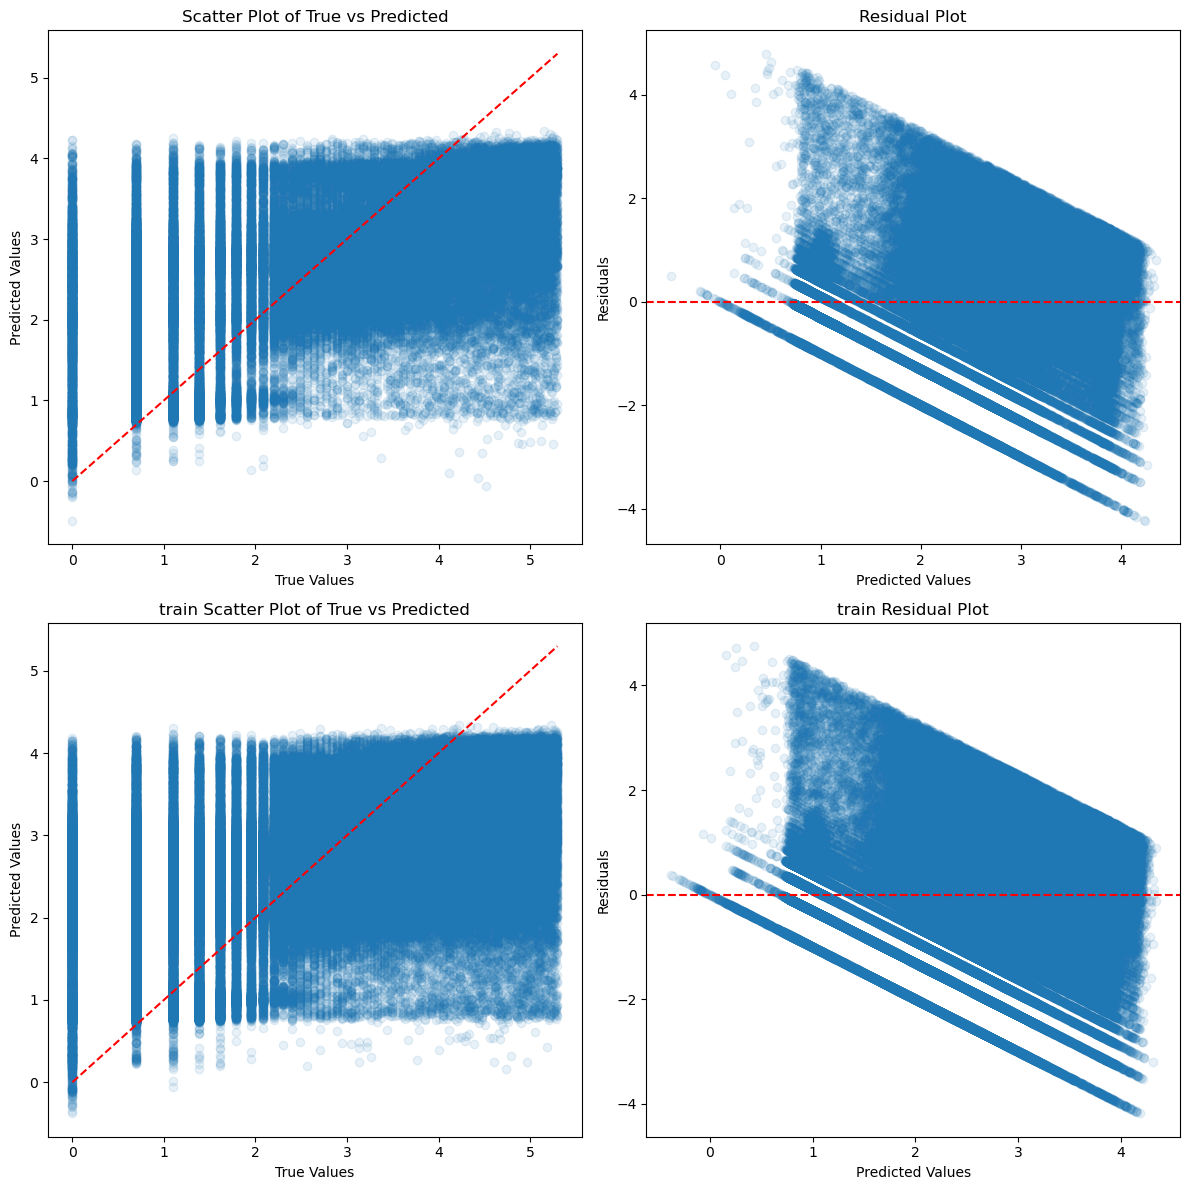

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 假设 y_test 是真实值，predictions 是预测值
residuals = targets - predictions
residuals = residuals.flatten()  # 将 residuals 转换为一维数组
residuals_train = train_targets - train_predictions
residuals_train = residuals_train.flatten()  # 将 residuals 转换为一维数组

# 创建 2x2 的子图（一个 2 行 2 列的布局）
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# 绘制散点图
axes[0, 0].scatter(targets, predictions, alpha=0.1, s=10)
axes[0, 0].plot([min(targets), max(targets)], [min(targets), max(targets)], color='red', linestyle='--')
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs Predicted')

# 绘制残差图
axes[0, 1].scatter(predictions, residuals, alpha=0.1)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# # 绘制误差分布图
# axes[1, 0].hist(residuals, bins=30, density=True, alpha=0.6, color='g')
# axes[1, 0].set_xlabel('Residuals')
# axes[1, 0].set_ylabel('Frequency')
# axes[1, 0].set_title('Error Distribution')

# # 绘制 Q-Q 图
# stats.probplot(residuals, dist="norm", plot=axes[1, 1])
# axes[1, 1].set_title('Q-Q Plot')

# 绘制散点图
axes[1, 0].scatter(train_targets, train_predictions, alpha=0.1)
axes[1, 0].plot([min(train_targets), max(train_targets)], [min(train_targets), max(train_targets)], color='red', linestyle='--')
axes[1, 0].set_xlabel('True Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title('train Scatter Plot of True vs Predicted')

# 绘制残差图
axes[1, 1].scatter(train_predictions, residuals_train, alpha=0.1)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('train Residual Plot')

# 调整布局
plt.tight_layout()
plt.show()


In [83]:
max(y_test)

array([16515])

IndexError: index 1 is out of bounds for axis 1 with size 1

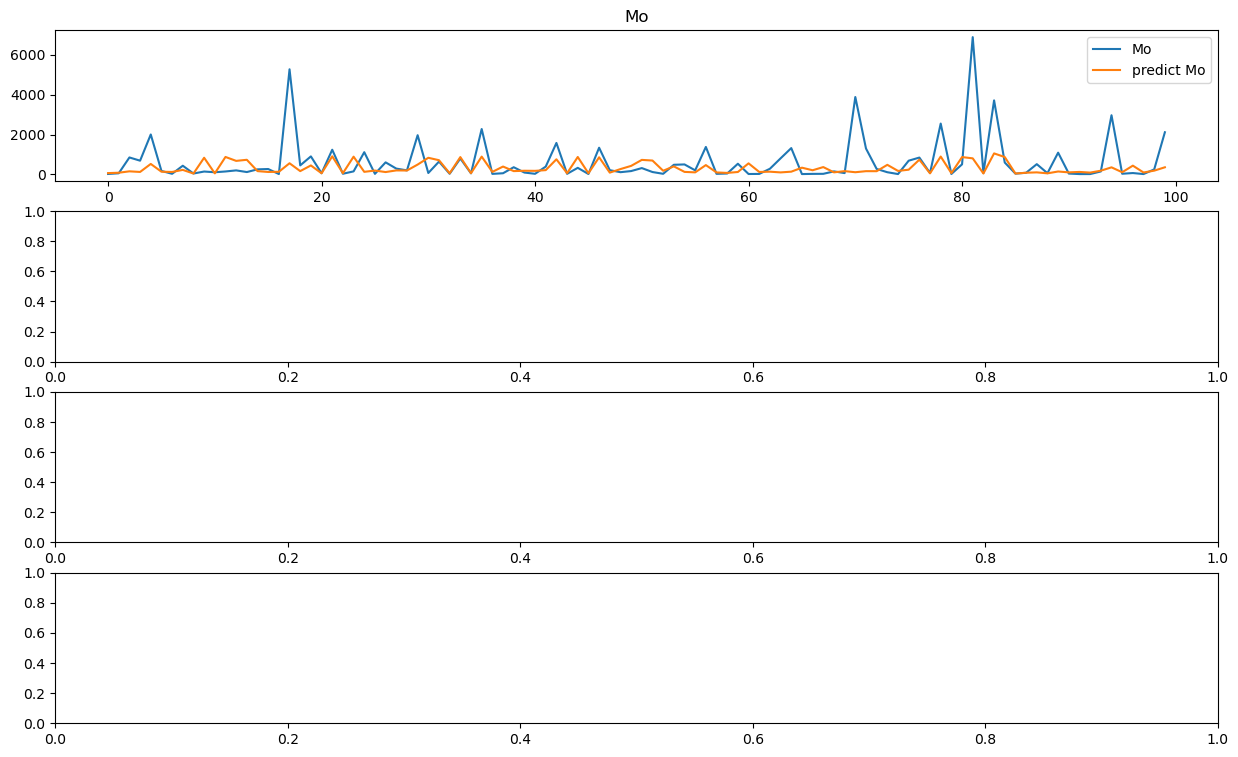

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)
num = 8000
start = 0
end = 100
p_round = predictions.round()
t_round = y_test #targets.round()
p1 = p_round[start:end]
t1 = t_round[start:end]
# 创建一个包含三个子图的画布
fig, axs = plt.subplots(4, 1, figsize=(15, 9))

# 在第一个子图中绘制 y1
axs[0].plot(t1[:], label='Mo')
axs[0].plot(p1[:], label='predict Mo')
#
axs[0].set_title('Mo')
axs[0].legend(loc='upper right')

# 在第二个子图中绘制 y2
axs[1].plot(t1[:, 1], label='O')
axs[1].plot(p1[:, 1], label='predict O')
# axs[1].plot(p1[:, 1], color='blue', label='predict O')
# axs[1].plot(t1[:, 1], color='red', label='O')
axs[1].set_title('O')
axs[1].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[2].plot(t1[:, 2], label='S')
axs[2].plot(p1[:, 2], label='predict S')
axs[2].set_title('S')
axs[2].legend(loc='upper right')
# 在第三个子图中绘制 y3
# axs[3].plot(t1[:, 3], label='target')
# axs[3].plot(p1[:, 3], label='predict')
# axs[3].set_title('time')
# axs[3].legend(loc='upper right')
# 设置统一的横坐标标签
for ax in axs:
    # plt.xlim(1100, 1200)
    ax.set_xlabel('state transition')
# axs[0].set_xlim(1100, 1200)
# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
# plt.savefig('result.png')

In [140]:
t_round.shape

NameError: name 't_round' is not defined

In [151]:
dd = np.array(cy_data[0])
dd.shape

(464, 4)

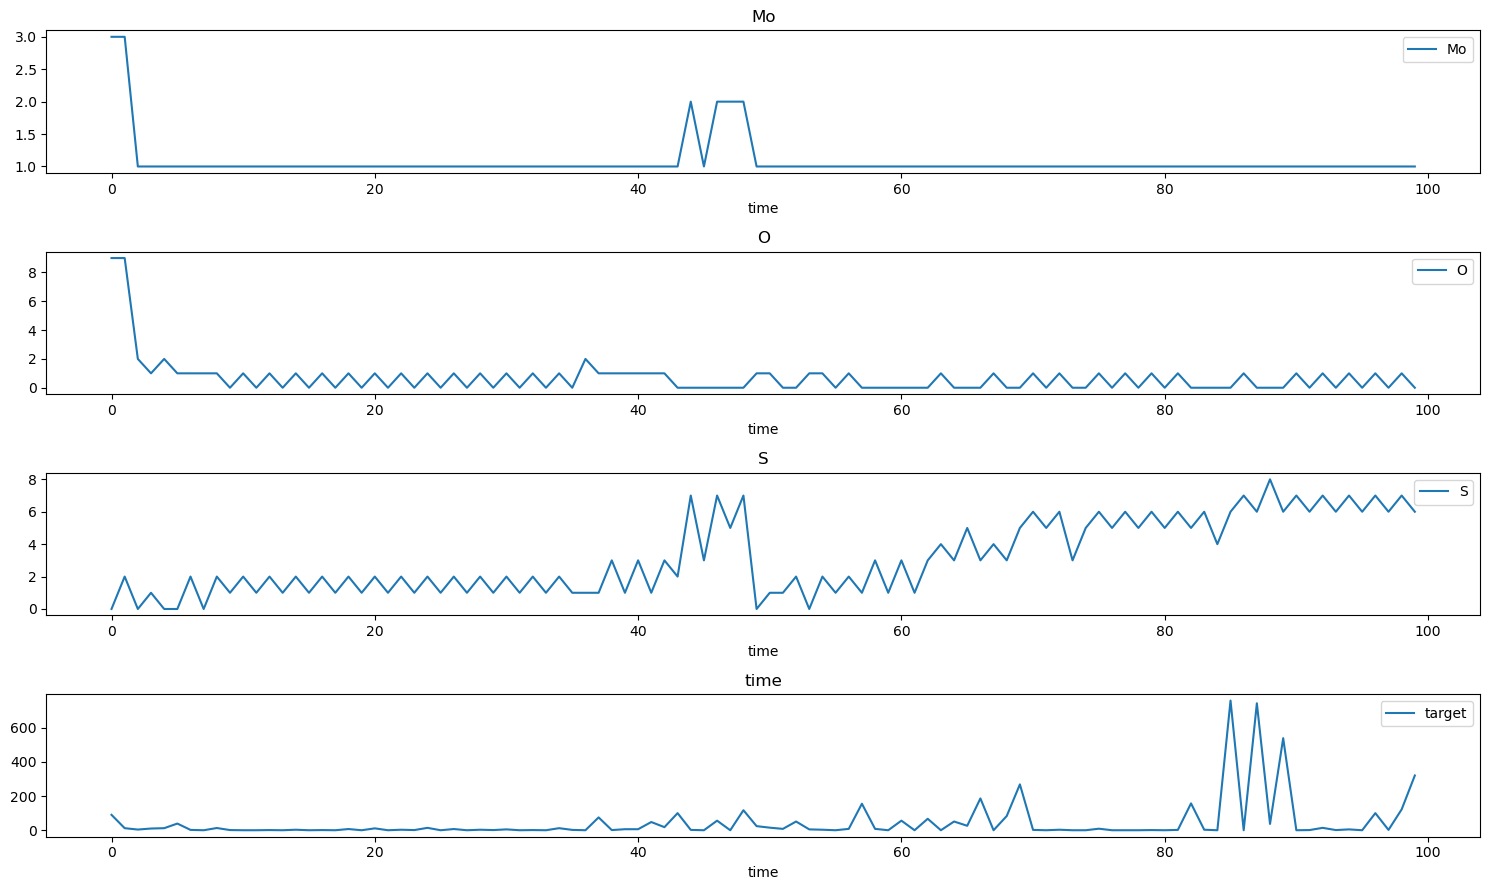

In [152]:
# 可视化cy_data
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)
num = 8000
start = 0
end = 100
# p_round = predictions.round()
t_round = dd #targets.round()
# p1 = p_round[start:end, :]
t1 = t_round[start:end, :]
# 创建一个包含三个子图的画布
fig, axs = plt.subplots(4, 1, figsize=(15, 9))

# 在第一个子图中绘制 y1
axs[0].plot(t1[:, 0], label='Mo')
# axs[0].plot(p1[:, 0], label='predict Mo')
#
axs[0].set_title('Mo')
axs[0].legend(loc='upper right')

# 在第二个子图中绘制 y2
axs[1].plot(t1[:, 1], label='O')
# axs[1].plot(p1[:, 1], label='predict O')
# axs[1].plot(p1[:, 1], color='blue', label='predict O')
# axs[1].plot(t1[:, 1], color='red', label='O')
axs[1].set_title('O')
axs[1].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[2].plot(t1[:, 2], label='S')
# axs[2].plot(p1[:, 2], label='predict S')
axs[2].set_title('S')
axs[2].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[3].plot(t1[:, 3], label='target')
# axs[3].plot(p1[:, 3], label='predict')
axs[3].set_title('time')
axs[3].legend(loc='upper right')
# 设置统一的横坐标标签
for ax in axs:
    # plt.xlim(1100, 1200)
    ax.set_xlabel('time')
# axs[0].set_xlim(1100, 1200)
# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
# plt.savefig('result.png')

In [1]:
import numpy as np
ss = np.load('../results/mul_T900_ss.npz')
ss_targets = ss['arr1']
ss_predictions = ss['arr2']

sts = np.load('../results/mul_T900_sts.npz')
sts_targets = sts['arr1']
sts_predictions = sts['arr2']

stst = np.load('../results/mul_T900_stst.npz')
stst_targets = stst['arr1']
stst_predictions = stst['arr2']

NameError: name 'ss_predictions' is not defined

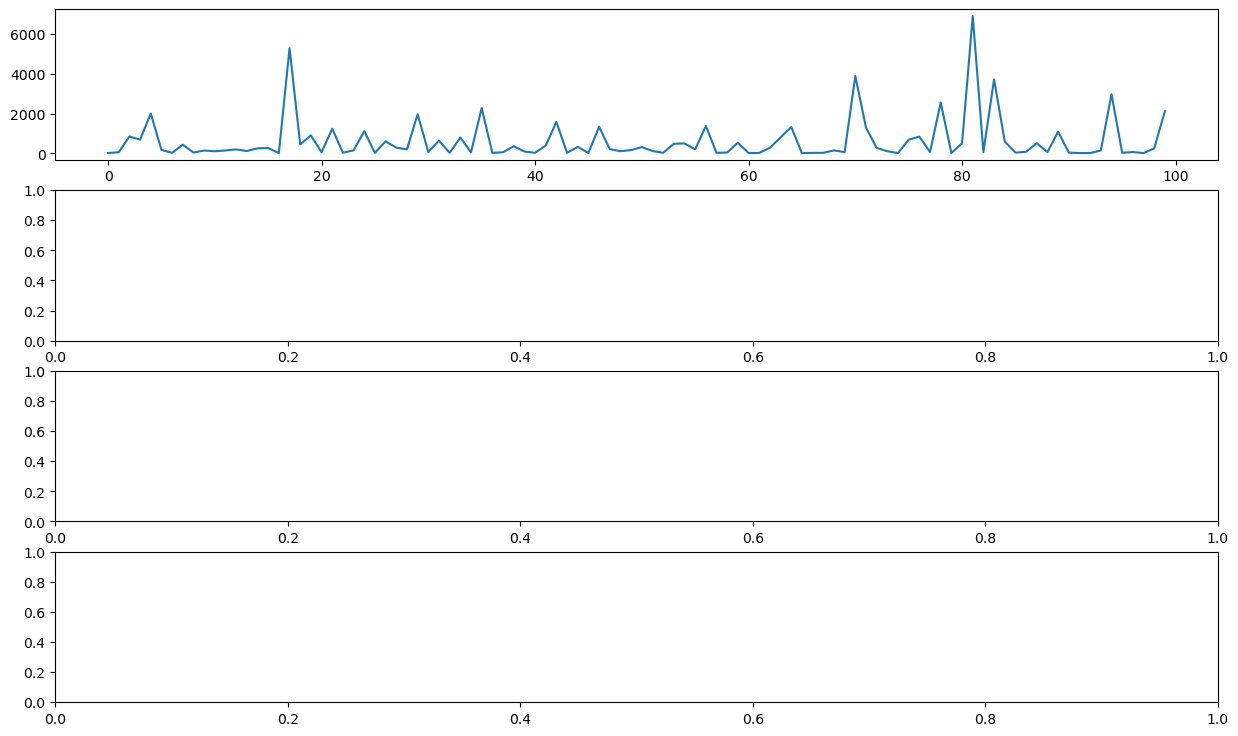

In [116]:
# 可视化cy_data
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)
num = 8000
start = 0
end = 100
# p_round = predictions.round()
t_round = targets.round()  # stst_targets
# p1 = p_round[start:end, :]
t1 = t_round[start:end, :]
# 创建一个包含三个子图的画布
fig, axs = plt.subplots(4, 1, figsize=(15, 9))

# 在第一个子图中绘制 y1
axs[0].plot(t1[:, 0], label='Mo')
axs[0].plot(ss_predictions[start:end, 0], label='ss_predictions')
axs[0].plot(sts_predictions[start:end, 0], label='sts_predictions')
axs[0].plot(stst_predictions[start:end, 0], label='stst_predictions')
#
axs[0].set_title('Mo')
axs[0].legend(loc='upper right')

# 在第二个子图中绘制 y2
axs[1].plot(t1[:, 1], label='O')
axs[1].plot(ss_predictions[start:end, 1], label='ss_predictions')
axs[1].plot(sts_predictions[start:end, 1], label='sts_predictions')
axs[1].plot(stst_predictions[start:end, 1], label='stst_predictions')
# axs[1].plot(p1[:, 1], label='predict O')
# axs[1].plot(p1[:, 1], color='blue', label='predict O')
# axs[1].plot(t1[:, 1], color='red', label='O')
axs[1].set_title('O')
axs[1].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[2].plot(t1[:, 2], label='S')
axs[2].plot(ss_predictions[start:end, 2], label='ss_predictions')
axs[2].plot(sts_predictions[start:end, 2], label='sts_predictions')
axs[2].plot(stst_predictions[start:end, 2], label='stst_predictions')
# axs[2].plot(p1[:, 2], label='predict S')
axs[2].set_title('S')
axs[2].legend(loc='upper right')
# 在第三个子图中绘制 y3
# axs[3].plot(t1[:, 3], label='target')
# # axs[3].plot(p1[:, 3], label='predict')
# axs[3].set_title('time')
# axs[3].legend(loc='upper right')
# 设置统一的横坐标标签
for ax in axs:
    # plt.xlim(1100, 1200)
    ax.set_xlabel('time')
# axs[0].set_xlim(1100, 1200)
# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
# plt.savefig('result.png')